In [3]:
# STARTING THE CODE 
# -----------------------------------------------------

# Importing seaborn packages
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.ticker import ScalarFormatter
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from functools import reduce
from sklearn.preprocessing import MinMaxScaler

# Applying the default theme to seaborn
sns.set_theme()

In [4]:
#------------------------------------------------------
# INPUT NECESSARY: MAKE SURE THIS IS THE CORRECT DIRECTORY
#------------------------------------------------------
import os
os.chdir('/Users/agathecrosnier') # Change your user name accordingly

In [5]:
# IMPORTING NECESSARY DATA

# LCA database
LCA_database = pd.read_excel('Desktop/PDM/Modelling_data/LCA impacts/LCA_database_ecoinvent_agribalyse.xlsx', sheet_name='scoped_env_impacts', header=0)

# Livestocks matched LCA
livestock_matched_LCA = pd.read_excel('Desktop/PDM/Modelling_data/computed_data/animals_matched_LCA.xlsx', sheet_name='livestock_matched_2050', header=0)

# Data from the scenarios
crops_fish = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios.xlsx', sheet_name='crops_fish', header=1)
livestock = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios.xlsx', sheet_name='livestock_conv_org_for_code', header=0)
feed = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios.xlsx', sheet_name='feed', header=0)
crops_fish_T = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios.xlsx', sheet_name='crops_fish_T', header=0)
livestock_T = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios.xlsx', sheet_name='livestock_T', header=0)
livestock_T2 = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios.xlsx', sheet_name='livestock_T2', header=0)
crop_area_T = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios.xlsx', sheet_name='crop_area_T', header=0)
crop_fish_no_feed = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios.xlsx', sheet_name='crop_fish_food_without_feed', header=0)
livestock_conv_org_T = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/calculs_impacts_scenarios.xlsx', sheet_name='livestock_conv_org_T', header=0)

In [6]:
# CREATING CUSTOM PALETTES

# SCENARIOS _____________________________________

custom_palette_sce1 = [
    (195, 161, 122),  # rgba(195, 161, 122, 1)
    (183, 118, 82),   # rgba(183, 118, 82, 1)
    (229, 221, 135),  # rgba(229, 221, 135, 1)
    (86, 125, 74)     # rgba(86, 125, 74, 1)
]

# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_sce1 = [(r/255, g/255, b/255) for r, g, b in custom_palette_sce1]

custom_palette_sce2 = [
    (216, 186, 115),  # rgba(216, 186, 115, 1)
    (170, 143, 78),   # rgba(170, 143, 78, 1)
    (180, 209, 136),  # rgba(180, 209, 136, 1)
    (112, 142, 67)
]

# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_sce2 = [(r/255, g/255, b/255) for r, g, b in custom_palette_sce2]

custom_palette_sce3 = [
    (251, 188, 192),  # rgba(251, 188, 192, 1)
    (197, 120, 125),  # rgba(197, 120, 125, 1)
    (192, 212, 133),  # rgba(192, 212, 133, 1)
    (126, 149, 60)    # rgba(126, 149, 60, 1)
]

# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_sce3 = [(r/255, g/255, b/255) for r, g, b in custom_palette_sce3]


# CROPS _____________________________________

custom_palette_crops = [
    (231, 185, 0),
    (246, 231, 171),
    (255, 213, 39),
    (255, 190, 59),
    (255, 239, 178),
    (235, 150, 0),
    (195, 157, 0),
    (214, 189, 235),
    (155, 134, 173),
    (121, 81, 156),
    (152, 97, 2),
    (157, 206, 137),
    (217, 244, 206),
    (85, 127, 68),
    (140, 182, 210),
    (82, 123, 149),
    (221, 158, 62),
    (125, 56, 126),
    (81, 128, 28),
    (185, 218, 147),
    (131, 180, 75)
]
# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_crops = [(r/255, g/255, b/255) for r, g, b in custom_palette_crops]

# LIVESTOCK _____________________________________

custom_palette_livestock = [
    (231, 190, 180),
    (255, 231, 224),
    (189, 129, 113),
    (255, 190, 173),
    (212, 74, 74),
    (249, 130, 130),
    (210, 109, 109),
    (141, 52, 52),
    (255, 182, 217),
    (255, 144, 110),
    (189, 97, 69),
    (134, 203, 226)
]
# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_livestock = [(r/255, g/255, b/255) for r, g, b in custom_palette_livestock]

# LIVESTOCK, FISH, CROPS _____________________________________
custom_palette_lfc1 = [
    (231, 190, 180),
    (255, 231, 224),
    (189, 129, 113),
    (255, 190, 173),
    (212, 74, 74),
    (249, 130, 130),
    (210, 109, 109),
    (141, 52, 52),
    (255, 182, 217),
    (255, 144, 110),
    (189, 97, 69),
    (134, 203, 226),
    (231, 185, 0),
    (255, 234, 147),
    (255, 213, 39),
    (255, 190, 59),
    (235, 150, 0),
    (195, 157, 0),
    (255, 171, 171),
    (255, 138, 138),
    (194, 102, 102),
    (152, 97, 2),
    (85, 169, 92),
    (141, 198, 146),
    (78, 202, 89),
    (140, 182, 210),
    (82, 123, 149),
    (255, 154, 0),
    (109, 67, 109),
    (81, 128, 28),
    (185, 218, 147),
    (131, 180, 75)
]
# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_lfc1 = [(r/255, g/255, b/255) for r, g, b in custom_palette_lfc1]

custom_palette_lfc2 = [
    (255, 197, 183),
    (183, 90, 66),
    (211, 62, 23),
    (248, 131, 97),
    (212, 74, 74),
    (249, 130, 130),
    (210, 109, 109),
    (141, 52, 52),
    (255, 182, 217),
    (255, 144, 110),
    (189, 97, 69),
    (134, 203, 226),
    (231, 185, 0),
    (255, 234, 147),
    (255, 213, 39),
    (255, 190, 59),
    (235, 150, 0),
    (195, 157, 0),
    (255, 171, 171),
    (255, 138, 138),
    (194, 102, 102),
    (152, 97, 2),
    (54, 203, 67),
    (85, 169, 92),
    (190, 234, 194),
    (140, 182, 210),
    (82, 123, 149),
    (255, 154, 0),
    (109, 67, 109),
    (81, 128, 28),
    (185, 218, 147),
    (131, 180, 75)
]
# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_lfc2 = [(r/255, g/255, b/255) for r, g, b in custom_palette_lfc2]

custom_palette_lfc3 = [
    (255, 197, 183),
    (183, 90, 66),
    (211, 62, 23),
    (248, 131, 97),
    (212, 74, 74),
    (249, 130, 130),
    (210, 109, 109),
    (141, 52, 52),
    (253, 190, 215),
    (255, 144, 110),
    (189, 97, 69),
    (134, 203, 226),
    (231, 185, 0),
    (246, 231, 171),
    (255, 213, 39),
    (255, 190, 59),
    (255, 239, 178),
    (235, 150, 0),
    (195, 157, 0),
    (214, 189, 235),
    (155, 134, 173),
    (121, 81, 156),
    (152, 97, 2),
    (157, 206, 137),
    (217, 244, 206),
    (85, 127, 68),
    (140, 182, 210),
    (82, 123, 149),
    (221, 158, 62),
    (125, 56, 126),
    (81, 128, 28),
    (185, 218, 147),
    (131, 180, 75)
]
# Convert RGB values to the range [0, 1] and create the custom color palette
custom_palette_lfc3 = [(r/255, g/255, b/255) for r, g, b in custom_palette_lfc3]


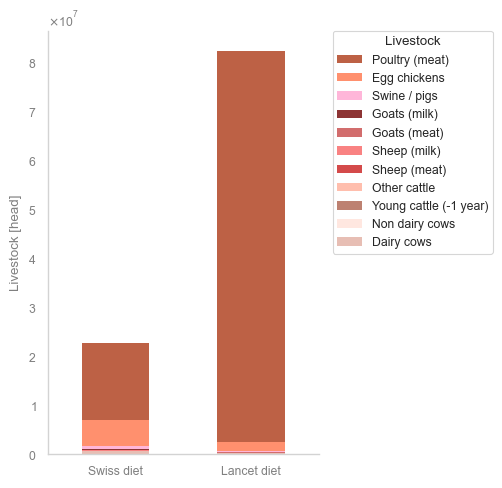

In [7]:
# GRAPH LIVESTOCK COUNT PER SCENARIO

# Creating a copy
livestock_graph_1 = livestock_T2.copy()

# Dropping the rows that repeat themselves
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals org BAU Swiss [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals conv BAU Swiss [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals org BAU Lancet [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals conv BAU Lancet [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals OA Swiss [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals OA Lancet [head]'].index)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_livestock)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(3.5, 5.5))
# Create the stacked bar plot
livestock_graph_1.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Livestock [head] or [1000 heads] for poultry')
plt.legend(title='Crop Items')
# Customize the x-axis tick labels
labels = ['Swiss diet', 'Lancet diet']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Livestock [head]')
y_label.set_color('grey')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LEGEND BOX ______________________________
# Customize the legend box
legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Livestock')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
#plt.savefig('Desktop/PDM/Graphiques/Scenario comparison/livestock_heads_1.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

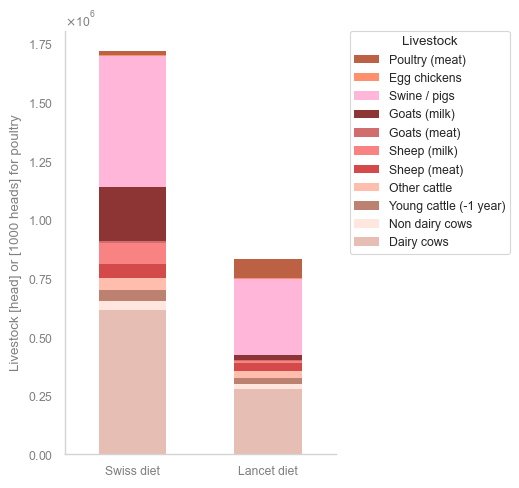

In [8]:
# GRAPH LIVESTOCK COUNT PER SCENARIO - UNIT CHANGE FOR POULTRY

# Creating a copy
livestock_graph_1 = livestock_T.copy()

# Dropping the rows that repeat themselves
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals org BAU Swiss [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals conv BAU Swiss [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals org BAU Lancet [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals conv BAU Lancet [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals OA Swiss [head]'].index)
livestock_graph_1 = livestock_graph_1.drop(livestock_graph_1[livestock_graph_1['Item'] == 'Animals OA Lancet [head]'].index)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_livestock)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(3.5, 5.5))
# Create the stacked bar plot
livestock_graph_1.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Livestock [head] or [1000 heads] for poultry')
plt.legend(title='Crop Items')
# Customize the x-axis tick labels
labels = ['Swiss diet', 'Lancet diet']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))


# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
#x_label = plt.xlabel('X-axis Label')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Livestock [head] or [1000 heads] for poultry')
y_label.set_color('grey')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LEGEND BOX ______________________________
# Customize the legend box
legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Livestock')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
#plt.savefig('Desktop/PDM/Graphiques/Scenario comparison/livestock_heads_2.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

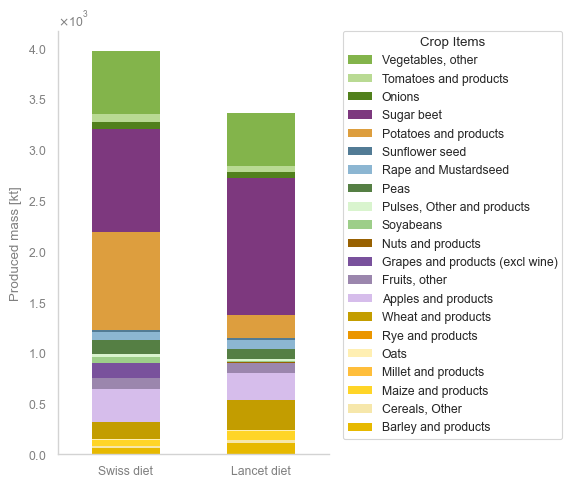

In [9]:
# GRAPH - PRODUCED CROP MASS

# Creating a copy
crops_graph_1 = crops_fish_T.copy()

# Dropping the row with Fish
#crops_graph_1 = crops_graph_1.drop(crops_graph_1[crops_graph_1['Item'] == 'Fish'].index)

# Dropping the fish column
#columns_to_drop = ['Mass org BAU Swiss [kt]', 'Mass conv BAU Swiss [kt]', 'Mass BAU Swiss [kt]', 'Mass org BAU Lancet [kt]', 'Mass conv BAU Lancet [kt]', 'Mass BAU Lancet [kt]' ]
columns_to_drop = ['Fish']
crops_graph_2  = crops_graph_1 .drop(columns_to_drop, axis=1)

# Dropping the rows that repeat themselves
crops_graph_2 = crops_graph_2.drop(crops_graph_2[crops_graph_2['Item'] == 'Mass org BAU Swiss [kt]'].index)
crops_graph_2 = crops_graph_2.drop(crops_graph_2[crops_graph_2['Item'] == 'Mass conv BAU Swiss [kt]'].index)
crops_graph_2 = crops_graph_2.drop(crops_graph_2[crops_graph_2['Item'] == 'Mass org BAU Lancet [kt]'].index)
crops_graph_2 = crops_graph_2.drop(crops_graph_2[crops_graph_2['Item'] == 'Mass conv BAU Lancet [kt]'].index)
crops_graph_2 = crops_graph_2.drop(crops_graph_2[crops_graph_2['Item'] == 'Mass BAU Swiss [kt]'].index)
crops_graph_2 = crops_graph_2.drop(crops_graph_2[crops_graph_2['Item'] == 'Mass BAU Lancet [kt]'].index)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_crops)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(3.5, 5.5))
# Create the stacked bar plot
crops_graph_2.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='Crop Items')
# Customize the x-axis tick labels
labels = ['Swiss diet', 'Lancet diet']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
#x_label = plt.xlabel('X-axis Label')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Produced mass [kt]')
y_label.set_color('grey')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LEGEND BOX ______________________________
# Customize the legend box
legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Crop Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
#plt.savefig('Desktop/PDM/Graphiques/Scenario comparison/crop_production_mass.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()


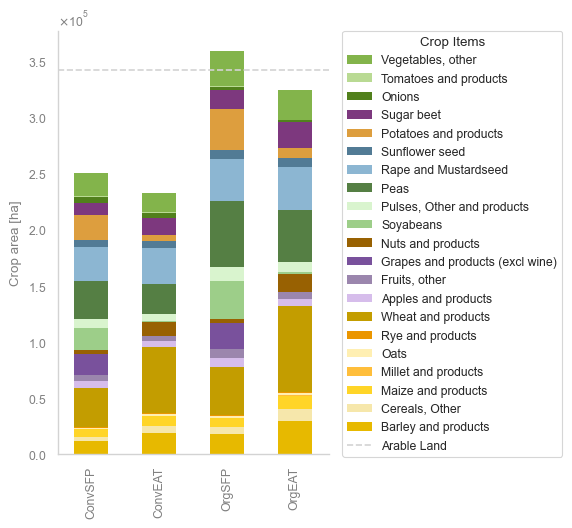

In [10]:
# GRAPH AREA PER CROP TYPE

# creating a copy 
crop_area_graph_1 = crop_area_T.copy()

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_crops)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(3.5, 5.5))
# Create the stacked bar plot
crop_area_graph_1.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='Crop Items')
# Customize the x-axis tick labels
labels = ['ConvSFP', 'ConvEAT', 'OrgSFP', 'OrgEAT']
ax.set_xticklabels(labels, rotation = 90) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
#x_label = plt.xlabel('X-axis Label')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Crop area [ha]')
y_label.set_color('grey')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = arable land available in 2050
ax.axhline(y=342284.5467, color='lightgrey', linestyle='--')

# LEGEND BOX ______________________________
# Customize the legend box
legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
#ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Crop Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Create a custom legend entry for the line
custom_legend = [Line2D([0], [0], color='lightgrey', linestyle='--', label='Arable Land')]

# Combine the handles and labels from both legends
combined_handles = list(reversed(handles)) + custom_legend
combined_labels = list(reversed(labels)) + ['Arable Land']

# Create a new legend with the combined handles and labels
legend = ax.legend(combined_handles, combined_labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Crop Items')

# SAVING IN PNG ______________________________
# Save the plot in PNG format
#plt.savefig('Desktop/PDM/Graphiques/Scenario comparison/crop_area_vs_arable_land.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

In [11]:
# ENVIRONMENTAL IMPACTS: PREPARATION

# Importation of LCA item name to match the LCA database (food_balance_items)
fb_matched_LCA_items = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/food_balance_items.xlsx', sheet_name='plant_prod_CH', header=0)

# Creating separated df for each category: 'Conventionnal CH', 'Conventionnal GLO', 'Organic CH', 'Swiss integrated production'
conv_ch = fb_matched_LCA_items.copy()                    # Creating copies
org_ch = fb_matched_LCA_items.copy()

# Selecting the columns based on the desired df
conv_ch = conv_ch[['Item', 'Conventionnal CH']]          
org_ch = org_ch[['Item', 'Organic CH']]


In [12]:
# IMPACTS COMPUTATION - BAU SWISS

# Preparation CROP & FISH - FEED NOT CONSIDERED
crops_fish_BAU_swiss = crop_fish_no_feed .copy()
columns_to_drop = ['Mass BAU Swiss [kt]', 'Mass org BAU Lancet [kt]', 'Mass conv BAU Lancet [kt]', 'Mass OA Swiss [kt]', 'Mass OA Lancet [kt]', 'Mass BAU Lancet [kt]']
crops_fish_BAU_swiss  = crops_fish_BAU_swiss.drop(columns_to_drop, axis=1)
# Dropping the row with Citrus, other
crops_fish_BAU_swiss = crops_fish_BAU_swiss.drop(crops_fish_BAU_swiss[crops_fish_BAU_swiss['Item'] == 'Citrus, Other'].index)

# Preparation LIVESTOCK
livestock_BAU_swiss = livestock.copy()
columns_to_drop = ['BAU Lancet', 'OA Swiss', 'OA Lancet']
livestock_BAU_swiss  = livestock_BAU_swiss.drop(columns_to_drop, axis=1)

# CROP & FISH ========================================
# CONVENTIONNAL AGR ___________________________
# Merging the items with conv_ch
crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss.merge(conv_ch, on='Item', how='left') 
# Merging with the LCA database
crops_fish_BAU_swiss_conv = pd.merge(crops_fish_BAU_swiss_conv, LCA_database, how='left', left_on='Conventionnal CH', right_on='Item')  
# Dropping columns
columns_to_drop = ['Mass org BAU Swiss [kt]', 'Conventionnal CH', 'Item_y']
crops_fish_BAU_swiss_conv  = crops_fish_BAU_swiss_conv.drop(columns_to_drop, axis=1)
# Renaming columns
crops_fish_BAU_swiss_conv.rename(columns = {'Item_x':'Item'}, inplace = True)
# Computing the environmental impacts
target_column_index = 1  # Index of the target column to multiply other columns with
columns_to_multiply = range(2, 11)  # Range of column indices to multiply
target_column = crops_fish_BAU_swiss_conv.iloc[:, target_column_index] * 10**6  # Converting from kt to kg
crops_fish_BAU_swiss_conv.iloc[:, columns_to_multiply] = crops_fish_BAU_swiss_conv.iloc[:, columns_to_multiply].multiply(target_column, axis=0)

# ORGANIC AGR _________________________________
# Merging the items with conv_ch
crops_fish_BAU_swiss_org = crops_fish_BAU_swiss.merge(org_ch, on='Item', how='left') 
# Merging with the LCA database
crops_fish_BAU_swiss_org = pd.merge(crops_fish_BAU_swiss_org, LCA_database, how='left', left_on='Organic CH', right_on='Item')  
# Dropping columns
columns_to_drop = ['Mass conv BAU Swiss [kt]', 'Organic CH', 'Item_y']
crops_fish_BAU_swiss_org  = crops_fish_BAU_swiss_org.drop(columns_to_drop, axis=1)
# Renaming columns
crops_fish_BAU_swiss_org.rename(columns = {'Item_x':'Item'}, inplace = True)
# Computing the environmental impacts
target_column_index = 1  # Index of the target column to multiply other columns with
columns_to_multiply = range(2, 11)  # Range of column indices to multiply
target_column = crops_fish_BAU_swiss_org.iloc[:, target_column_index] * 10**6  # Converting from kt to kg
crops_fish_BAU_swiss_org.iloc[:, columns_to_multiply] = crops_fish_BAU_swiss_org.iloc[:, columns_to_multiply].multiply(target_column, axis=0)

# ORG & CONV _________________________________
# Filling the NaN with zeros
crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss_conv.fillna(0)
crops_fish_BAU_swiss_org = crops_fish_BAU_swiss_org.fillna(0)
# Setting Item as index
crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss_conv.set_index('Item')
crops_fish_BAU_swiss_org = crops_fish_BAU_swiss_org.set_index('Item')
#Dropping the mass columns
columns_to_drop = ['Mass org BAU Swiss [kt]']
crops_fish_BAU_swiss_org = crops_fish_BAU_swiss_org.drop(columns_to_drop, axis=1)
columns_to_drop = ['Mass conv BAU Swiss [kt]']
crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss_conv.drop(columns_to_drop, axis=1)
# Summing the df
crops_fish_BAU_swiss = crops_fish_BAU_swiss_conv.add(crops_fish_BAU_swiss_org)

# LIVESTOCK ===================================
# Merging the items with conv_ch
livestock_BAU_swiss = livestock_BAU_swiss.merge(livestock_matched_LCA, on='Item', how='inner') 
# Merging with the LCA database
livestock_BAU_swiss = pd.merge(livestock_BAU_swiss, LCA_database, how='inner', left_on='Item LCA', right_on='Item') 
# Dropping columns
columns_to_drop = ['Lifetime LCA [y]', 'Item LCA', 'Item_y']
livestock_BAU_swiss = livestock_BAU_swiss.drop(columns_to_drop, axis=1)
# Renaming columns
livestock_BAU_swiss.rename(columns = {'Item_x':'Item'}, inplace = True)
# Computing the environmental impacts
target_column_index = 2  # Index of the target column to multiply other columns with
columns_to_multiply = range(3, 12)  # Range of column indices to multiply
target_column = livestock_BAU_swiss.iloc[:, target_column_index]
livestock_BAU_swiss.iloc[:, columns_to_multiply] = livestock_BAU_swiss.iloc[:, columns_to_multiply].multiply(target_column, axis=0)
# Diving by the lifetime
target_column_index = 1  # Index of the target column to divide other columns with => 'Lifetime [y]'
columns_to_multiply = range(3, 12)  # Range of column indices to multiply
target_column = livestock_BAU_swiss.iloc[:, target_column_index]
livestock_BAU_swiss.iloc[:, columns_to_multiply] = livestock_BAU_swiss.iloc[:, columns_to_multiply].divide(target_column, axis=0)
# Dropping the lifetspan and nb of animals
columns_to_drop = ['Lifespan [yr]', 'BAU Swiss']
livestock_BAU_swiss = livestock_BAU_swiss.drop(columns_to_drop, axis=1)
# Separating the df conv vs org
BAU_org = livestock_BAU_swiss[livestock_BAU_swiss['Item'].str.endswith('Org')]
BAU_conv = livestock_BAU_swiss[livestock_BAU_swiss['Item'].str.endswith('Conv')]
# Creating copies
BAU_org = BAU_org.copy()
BAU_conv = BAU_conv.copy()
# Drop '- Org' and '- Conv'
BAU_org.loc[:, 'Item'] = BAU_org['Item'].str.replace(' - Org', '')
BAU_conv.loc[:, 'Item'] = BAU_conv['Item'].str.replace(' - Conv', '')
# Setting Item as index
BAU_org = BAU_org.set_index('Item')
BAU_conv = BAU_conv.set_index('Item')
# Summing the df
livestock_BAU_swiss = BAU_conv.add(BAU_org)

# CROP, FISH & LIVESTOCK ===================================
BAU_swiss = pd.concat([crops_fish_BAU_swiss, livestock_BAU_swiss])

# EXPORTING TO EXCEL
#BAU_swiss.to_excel(r'Desktop/PDM/Modelling_data/Environmental impacts/scenarios_from_code.xlsx', sheet_name='BAU_swiss', index=False) 

BAU_swiss

,Climate change [ kg CO2 eq],Acidification [ mol H+ eq],"Eutrophication, freshwater [ kg P eq]","Eutrophication, marine [ kg N eq]","Eutrophication, terrestrial [ mol N eq]","Ecotoxicity, freshwater [ CTUe]",Land use [ Pt],"Water use [ m3 depriv,]","Resource use, fossils [ MJ]"
Item,,,,,,,,,
Soyabeans,4.693481e+07,2.366346e+05,12825.790992,5.524184e+05,8.946740e+05,2.375660e+09,8.250965e+09,3.431668e+06,1.546158e+08
Potatoes and products,6.376486e+07,1.310751e+06,22286.932891,8.744644e+05,5.586337e+06,8.007522e+09,1.445629e+10,4.647137e+08,6.763860e+08
Sugar beet,4.380603e+07,7.977929e+05,9202.414475,8.300104e+05,3.502067e+06,1.881427e+09,7.728716e+09,6.927263e+06,2.436284e+08
Nuts and products,9.791445e+06,1.364779e+05,4351.248785,5.142041e+04,4.980856e+05,5.240582e+08,6.881542e+08,2.930595e+08,1.222452e+08
"Pulses, Other and products",1.824242e+07,3.949285e+04,9751.813035,6.365972e+03,1.246840e+05,2.157982e+09,-3.570173e+11,9.364377e+05,4.567019e+07
Peas,4.447951e+07,3.445878e+05,20601.884134,1.602375e+06,1.026935e+06,7.597117e+09,1.836469e+10,1.232728e+08,3.808130e+08
Rape and Mustardseed,5.895333e+07,6.046026e+05,14812.417687,4.482240e+05,2.357342e+06,3.319025e+09,1.259472e+10,2.112801e+07,5.348193e+08
Sunflower seed,1.124754e+07,3.932779e+05,6598.494073,5.783733e+05,1.700929e+06,7.307872e+08,3.460863e+09,2.980519e+06,7.422484e+07
Apples and products,2.907879e+07,3.432237e+05,8936.820686,1.899252e+05,1.362919e+06,5.282080e+09,4.541957e+09,7.886229e+08,4.788492e+08


In [13]:
# IMPACTS COMPUTATION - BAU Lancet

# Preparation CROP & FISH
crops_fish_BAU_swiss = crop_fish_no_feed.copy()
columns_to_drop = ['Mass BAU Swiss [kt]', 'Mass org BAU Swiss [kt]', 'Mass conv BAU Swiss [kt]', 'Mass OA Swiss [kt]', 'Mass OA Lancet [kt]', 'Mass BAU Lancet [kt]']
crops_fish_BAU_swiss  = crops_fish_BAU_swiss.drop(columns_to_drop, axis=1)
# Dropping the row with Citrus, other
crops_fish_BAU_swiss = crops_fish_BAU_swiss.drop(crops_fish_BAU_swiss[crops_fish_BAU_swiss['Item'] == 'Citrus, Other'].index)

# Preparation LIVESTOCK
livestock_BAU_swiss = livestock.copy()
columns_to_drop = ['BAU Swiss', 'OA Lancet', 'OA Swiss']
livestock_BAU_swiss  = livestock_BAU_swiss.drop(columns_to_drop, axis=1)

# CROP & FISH ========================================
# CONVENTIONNAL AGR ___________________________
# Merging the items with conv_ch
crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss.merge(conv_ch, on='Item', how='left') 
# Merging with the LCA database
crops_fish_BAU_swiss_conv = pd.merge(crops_fish_BAU_swiss_conv, LCA_database, how='left', left_on='Conventionnal CH', right_on='Item')  
# Dropping columns
columns_to_drop = ['Mass org BAU Lancet [kt]', 'Conventionnal CH', 'Item_y']
crops_fish_BAU_swiss_conv  = crops_fish_BAU_swiss_conv.drop(columns_to_drop, axis=1)
# Renaming columns
crops_fish_BAU_swiss_conv.rename(columns = {'Item_x':'Item'}, inplace = True)
# Computing the environmental impacts
target_column_index = 1  # Index of the target column to multiply other columns with
columns_to_multiply = range(2, 11)  # Range of column indices to multiply
target_column = crops_fish_BAU_swiss_conv.iloc[:, target_column_index] * 10**6  # Converting from kt to kg
crops_fish_BAU_swiss_conv.iloc[:, columns_to_multiply] = crops_fish_BAU_swiss_conv.iloc[:, columns_to_multiply].multiply(target_column, axis=0)

# ORGANIC AGR _________________________________
# Merging the items with conv_ch
crops_fish_BAU_swiss_org = crops_fish_BAU_swiss.merge(org_ch, on='Item', how='left') 
# Merging with the LCA database
crops_fish_BAU_swiss_org = pd.merge(crops_fish_BAU_swiss_org, LCA_database, how='left', left_on='Organic CH', right_on='Item')  
# Dropping columns
columns_to_drop = ['Mass conv BAU Lancet [kt]', 'Organic CH', 'Item_y']
crops_fish_BAU_swiss_org  = crops_fish_BAU_swiss_org.drop(columns_to_drop, axis=1)
# Renaming columns
crops_fish_BAU_swiss_org.rename(columns = {'Item_x':'Item'}, inplace = True)
# Computing the environmental impacts
target_column_index = 1  # Index of the target column to multiply other columns with
columns_to_multiply = range(2, 11)  # Range of column indices to multiply
target_column = crops_fish_BAU_swiss_org.iloc[:, target_column_index] * 10**6  # Converting from kt to kg
crops_fish_BAU_swiss_org.iloc[:, columns_to_multiply] = crops_fish_BAU_swiss_org.iloc[:, columns_to_multiply].multiply(target_column, axis=0)

# ORG & CONV _________________________________
# Filling the NaN with zeros
crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss_conv.fillna(0)
crops_fish_BAU_swiss_org = crops_fish_BAU_swiss_org.fillna(0)
# Setting Item as index
crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss_conv.set_index('Item')
crops_fish_BAU_swiss_org = crops_fish_BAU_swiss_org.set_index('Item')
#Dropping the mass columns
columns_to_drop = ['Mass org BAU Lancet [kt]']
crops_fish_BAU_swiss_org = crops_fish_BAU_swiss_org.drop(columns_to_drop, axis=1)
columns_to_drop = ['Mass conv BAU Lancet [kt]']
crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss_conv.drop(columns_to_drop, axis=1)
# Summing the df
crops_fish_BAU_swiss = crops_fish_BAU_swiss_conv.add(crops_fish_BAU_swiss_org)

# LIVESTOCK ===================================
# Merging the items with conv_ch
livestock_BAU_swiss = livestock_BAU_swiss.merge(livestock_matched_LCA, on='Item', how='inner') 
# Merging with the LCA database
livestock_BAU_swiss = pd.merge(livestock_BAU_swiss, LCA_database, how='inner', left_on='Item LCA', right_on='Item') 
# Dropping columns
columns_to_drop = ['Lifetime LCA [y]', 'Item LCA', 'Item_y']
livestock_BAU_swiss = livestock_BAU_swiss.drop(columns_to_drop, axis=1)
# Renaming columns
livestock_BAU_swiss.rename(columns = {'Item_x':'Item'}, inplace = True)
# Computing the environmental impacts
target_column_index = 2  # Index of the target column to multiply other columns with
columns_to_multiply = range(3, 12)  # Range of column indices to multiply
target_column = livestock_BAU_swiss.iloc[:, target_column_index]
livestock_BAU_swiss.iloc[:, columns_to_multiply] = livestock_BAU_swiss.iloc[:, columns_to_multiply].multiply(target_column, axis=0)
# Diving by the lifetime
target_column_index = 1  # Index of the target column to divide other columns with => 'Lifetime [y]'
columns_to_multiply = range(3, 12)  # Range of column indices to multiply
target_column = livestock_BAU_swiss.iloc[:, target_column_index]
livestock_BAU_swiss.iloc[:, columns_to_multiply] = livestock_BAU_swiss.iloc[:, columns_to_multiply].divide(target_column, axis=0)
# Dropping the lifetspan and nb of animals
columns_to_drop = ['Lifespan [yr]', 'BAU Lancet']
livestock_BAU_swiss = livestock_BAU_swiss.drop(columns_to_drop, axis=1)
# Separating the df conv vs org
BAU_org = livestock_BAU_swiss[livestock_BAU_swiss['Item'].str.endswith('Org')]
BAU_conv = livestock_BAU_swiss[livestock_BAU_swiss['Item'].str.endswith('Conv')]
# Creating copies
BAU_org = BAU_org.copy()
BAU_conv = BAU_conv.copy()
# Drop '- Org' and '- Conv'
BAU_org.loc[:, 'Item'] = BAU_org['Item'].str.replace(' - Org', '')
BAU_conv.loc[:, 'Item'] = BAU_conv['Item'].str.replace(' - Conv', '')
# Setting Item as index
BAU_org = BAU_org.set_index('Item')
BAU_conv = BAU_conv.set_index('Item')
# Summing the df
livestock_BAU_swiss = BAU_conv.add(BAU_org)

# CROP, FISH & LIVESTOCK ===================================
BAU_Lancet = pd.concat([crops_fish_BAU_swiss, livestock_BAU_swiss])

# EXPORTING TO EXCEL
#BAU_Lancet.to_excel(r'Desktop/PDM/Modelling_data/Environmental impacts/scenarios_from_code.xlsx', sheet_name='BAU_Lancet', index=False) 
BAU_Lancet

,Climate change [ kg CO2 eq],Acidification [ mol H+ eq],"Eutrophication, freshwater [ kg P eq]","Eutrophication, marine [ kg N eq]","Eutrophication, terrestrial [ mol N eq]","Ecotoxicity, freshwater [ CTUe]",Land use [ Pt],"Water use [ m3 depriv,]","Resource use, fossils [ MJ]"
Item,,,,,,,,,
Soyabeans,1.927052e+06,1.371553e+04,617.332513,3.440345e+04,5.672828e+04,6.512662e+07,4.413974e+08,2.728793e+05,7.395056e+06
Potatoes and products,1.755852e+07,3.735915e+05,6328.065073,2.887400e+05,1.588768e+06,1.824959e+09,3.869671e+09,9.211243e+07,1.689144e+08
Sugar beet,5.809632e+07,1.057999e+06,12202.744419,1.099828e+06,4.642922e+06,2.491215e+09,1.024127e+10,9.187404e+06,3.230675e+08
Nuts and products,3.859773e+07,5.379937e+05,17152.556122,2.026985e+05,1.963446e+06,2.065829e+09,2.712693e+09,1.155236e+09,4.818885e+08
"Pulses, Other and products",1.412796e+07,3.058549e+04,7552.355203,4.930168e+03,9.656236e+04,1.671263e+09,-2.764943e+11,7.252303e+05,3.536957e+07
Peas,3.466040e+07,2.787684e+05,15988.982368,1.243106e+06,8.506442e+05,5.850447e+09,1.424076e+10,9.495141e+07,2.949651e+08
Rape and Mustardseed,6.119376e+07,6.246793e+05,15372.981439,4.633008e+05,2.433625e+06,3.448032e+09,1.308094e+10,2.194789e+07,5.554711e+08
Sunflower seed,1.169821e+07,4.090170e+05,6861.937305,6.010327e+05,1.768475e+06,7.588848e+08,3.596494e+09,3.100060e+06,7.718997e+07
Apples and products,2.445372e+07,2.909965e+05,7564.165588,1.667729e+05,1.161548e+06,4.658416e+09,3.872464e+09,6.795590e+08,4.031945e+08


In [14]:
# IMPACTS COMPUTATION - OA SWISS

# Preparation CROP & FISH - FEED NOT CONSIDERED
crops_fish_BAU_swiss = crop_fish_no_feed .copy()
columns_to_drop = ['Mass org BAU Swiss [kt]', 'Mass conv BAU Swiss [kt]','Mass BAU Swiss [kt]', 'Mass org BAU Lancet [kt]', 'Mass conv BAU Lancet [kt]','Mass BAU Lancet [kt]' , 'Mass OA Lancet [kt]' ]
crops_fish_BAU_swiss  = crops_fish_BAU_swiss.drop(columns_to_drop, axis=1)
# Dropping the row with Citrus, other
crops_fish_BAU_swiss = crops_fish_BAU_swiss.drop(crops_fish_BAU_swiss[crops_fish_BAU_swiss['Item'] == 'Citrus, Other'].index)

# Preparation LIVESTOCK
livestock_BAU_swiss = livestock.copy()
columns_to_drop = ['BAU Lancet', 'BAU Swiss', 'OA Lancet']
livestock_BAU_swiss  = livestock_BAU_swiss.drop(columns_to_drop, axis=1)

# CROP & FISH ========================================
# CONVENTIONNAL AGR ___________________________
# Merging the items with conv_ch
#crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss.merge(conv_ch, on='Item', how='left') 
# Merging with the LCA database
#crops_fish_BAU_swiss_conv = pd.merge(crops_fish_BAU_swiss_conv, LCA_database, how='left', left_on='Conventionnal CH', right_on='Item')  
# Dropping columns
#columns_to_drop = ['Mass org BAU Swiss [kt]', 'Conventionnal CH', 'Item_y']
#crops_fish_BAU_swiss_conv  = crops_fish_BAU_swiss_conv.drop(columns_to_drop, axis=1)
# Renaming columns
#crops_fish_BAU_swiss_conv.rename(columns = {'Item_x':'Item'}, inplace = True)
# Computing the environmental impacts
#target_column_index = 1  # Index of the target column to multiply other columns with
#columns_to_multiply = range(2, 11)  # Range of column indices to multiply
#target_column = crops_fish_BAU_swiss_conv.iloc[:, target_column_index] * 10**6  # Converting from kt to kg
#crops_fish_BAU_swiss_conv.iloc[:, columns_to_multiply] = crops_fish_BAU_swiss_conv.iloc[:, columns_to_multiply].multiply(target_column, axis=0)

# ORGANIC AGR _________________________________
# Merging the items with org_ch
crops_fish_BAU_swiss_org = crops_fish_BAU_swiss.merge(org_ch, on='Item', how='left') 
# Merging with the LCA database
crops_fish_BAU_swiss_org = pd.merge(crops_fish_BAU_swiss_org, LCA_database, how='left', left_on='Organic CH', right_on='Item')  
# Dropping columns
columns_to_drop = ['Organic CH', 'Item_y']
crops_fish_BAU_swiss_org  = crops_fish_BAU_swiss_org.drop(columns_to_drop, axis=1)
# Renaming columns
crops_fish_BAU_swiss_org.rename(columns = {'Item_x':'Item'}, inplace = True)
# Computing the environmental impacts
target_column_index = 1  # Index of the target column to multiply other columns with
columns_to_multiply = range(2, 11)  # Range of column indices to multiply
target_column = crops_fish_BAU_swiss_org.iloc[:, target_column_index] * 10**6  # Converting from kt to kg
crops_fish_BAU_swiss_org.iloc[:, columns_to_multiply] = crops_fish_BAU_swiss_org.iloc[:, columns_to_multiply].multiply(target_column, axis=0)
# Setting Item as index
crops_fish_BAU_swiss_org = crops_fish_BAU_swiss_org.set_index('Item')
# Dropping columns
columns_to_drop = ['Mass OA Swiss [kt]']
crops_fish_BAU_swiss_org  = crops_fish_BAU_swiss_org.drop(columns_to_drop, axis=1)

# ORG & CONV _________________________________
# Filling the NaN with zeros
#crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss_conv.fillna(0)
#crops_fish_BAU_swiss_org = crops_fish_BAU_swiss_org.fillna(0)
# Setting Item as index
#crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss_conv.set_index('Item')
#crops_fish_BAU_swiss_org = crops_fish_BAU_swiss_org.set_index('Item')
#Dropping the mass columns
#columns_to_drop = ['Mass org BAU Swiss [kt]']
#crops_fish_BAU_swiss_org = crops_fish_BAU_swiss_org.drop(columns_to_drop, axis=1)
#columns_to_drop = ['Mass conv BAU Swiss [kt]']
#crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss_conv.drop(columns_to_drop, axis=1)
# Summing the df
#crops_fish_BAU_swiss = crops_fish_BAU_swiss_conv.add(crops_fish_BAU_swiss_org)

# LIVESTOCK ===================================
# Merging the items with conv_ch
livestock_BAU_swiss = livestock_BAU_swiss.merge(livestock_matched_LCA, on='Item', how='inner') 
# Merging with the LCA database
livestock_BAU_swiss = pd.merge(livestock_BAU_swiss, LCA_database, how='inner', left_on='Item LCA', right_on='Item') 
# Dropping columns
columns_to_drop = ['Lifetime LCA [y]', 'Item LCA', 'Item_y']
livestock_BAU_swiss = livestock_BAU_swiss.drop(columns_to_drop, axis=1)
# Renaming columns
livestock_BAU_swiss.rename(columns = {'Item_x':'Item'}, inplace = True)
# Computing the environmental impacts
target_column_index = 2  # Index of the target column to multiply other columns with
columns_to_multiply = range(3, 12)  # Range of column indices to multiply
target_column = livestock_BAU_swiss.iloc[:, target_column_index]
livestock_BAU_swiss.iloc[:, columns_to_multiply] = livestock_BAU_swiss.iloc[:, columns_to_multiply].multiply(target_column, axis=0)
# Diving by the lifetime
target_column_index = 1  # Index of the target column to divide other columns with => 'Lifetime [y]'
columns_to_multiply = range(3, 12)  # Range of column indices to multiply
target_column = livestock_BAU_swiss.iloc[:, target_column_index]
livestock_BAU_swiss.iloc[:, columns_to_multiply] = livestock_BAU_swiss.iloc[:, columns_to_multiply].divide(target_column, axis=0)
# Dropping the lifetspan and nb of animals
columns_to_drop = ['Lifespan [yr]', 'OA Swiss']
livestock_BAU_swiss = livestock_BAU_swiss.drop(columns_to_drop, axis=1)
# Separating the df conv vs org
BAU_org = livestock_BAU_swiss[livestock_BAU_swiss['Item'].str.endswith('Org')]
BAU_conv = livestock_BAU_swiss[livestock_BAU_swiss['Item'].str.endswith('Conv')]
# Creating copies
BAU_org = BAU_org.copy()
BAU_conv = BAU_conv.copy()
# Drop '- Org' and '- Conv'
BAU_org.loc[:, 'Item'] = BAU_org['Item'].str.replace(' - Org', '')
BAU_conv.loc[:, 'Item'] = BAU_conv['Item'].str.replace(' - Conv', '')
# Setting Item as index
BAU_org = BAU_org.set_index('Item')
BAU_conv = BAU_conv.set_index('Item')
# Summing the df
livestock_BAU_swiss = BAU_conv.add(BAU_org)

# CROP, FISH & LIVESTOCK ===================================
OA_swiss = pd.concat([crops_fish_BAU_swiss_org, livestock_BAU_swiss])

# EXPORTING TO EXCEL
#OA_swiss.to_excel(r'Desktop/PDM/Modelling_data/Environmental impacts/scenarios_from_code.xlsx', index=True) 

OA_swiss

,Climate change [ kg CO2 eq],Acidification [ mol H+ eq],"Eutrophication, freshwater [ kg P eq]","Eutrophication, marine [ kg N eq]","Eutrophication, terrestrial [ mol N eq]","Ecotoxicity, freshwater [ CTUe]",Land use [ Pt],"Water use [ m3 depriv,]","Resource use, fossils [ MJ]"
Item,,,,,,,,,
Soyabeans,3.544288e+07,3.727636e+05,14087.657778,9.859218e+05,1.645757e+06,2.212887e+08,1.121028e+10,8.995175e+06,1.675506e+08
Potatoes and products,1.221084e+08,2.813658e+06,47261.224915,2.824465e+06,1.190876e+07,6.219908e+09,2.501974e+10,3.003201e+07,8.794411e+08
Sugar beet,1.177352e+07,2.293756e+05,2996.782715,5.219596e+05,1.439968e+06,1.758265e+09,4.821114e+09,1.752251e+06,7.708021e+07
Nuts and products,1.099707e+06,7.946550e+04,0.000000,1.673407e+04,3.554908e+05,-4.812292e+08,1.957703e+08,7.247044e+07,7.682338e+06
"Pulses, Other and products",3.697575e+06,2.719971e+04,6179.683036,5.391654e+03,1.129226e+05,-1.948667e+09,-2.579974e+11,5.774214e+05,2.252692e+07
Peas,8.837501e+07,2.797427e+06,27552.005604,2.042654e+06,1.243111e+07,7.561222e+08,2.209721e+10,1.650560e+07,3.894679e+08
Rape and Mustardseed,8.040294e+07,4.440638e+06,23141.932041,3.051561e+06,1.980314e+07,9.451081e+08,7.728891e+09,7.697398e+06,3.219069e+08
Sunflower seed,3.140399e+06,1.173488e+05,2225.574165,3.707533e+05,7.210995e+05,6.852427e+08,2.201216e+09,7.838738e+05,2.433444e+07
Apples and products,3.809787e+07,5.459629e+05,13695.559251,5.362712e+05,2.413220e+06,1.573868e+10,8.106463e+09,1.700051e+09,6.480547e+08


In [15]:
# IMPACTS COMPUTATION - OA Lancet

# Preparation CROP & FISH - FEED NOT CONSIDERED
crops_fish_BAU_swiss = crop_fish_no_feed .copy()
columns_to_drop = ['Mass org BAU Swiss [kt]', 'Mass conv BAU Swiss [kt]','Mass BAU Swiss [kt]', 'Mass org BAU Lancet [kt]', 'Mass conv BAU Lancet [kt]','Mass BAU Lancet [kt]' , 'Mass OA Swiss [kt]' ]
crops_fish_BAU_swiss  = crops_fish_BAU_swiss.drop(columns_to_drop, axis=1)
# Dropping the row with Citrus, other
crops_fish_BAU_swiss = crops_fish_BAU_swiss.drop(crops_fish_BAU_swiss[crops_fish_BAU_swiss['Item'] == 'Citrus, Other'].index)

# Preparation LIVESTOCK
livestock_BAU_swiss = livestock.copy()
columns_to_drop = ['BAU Lancet', 'BAU Swiss', 'OA Swiss']
livestock_BAU_swiss  = livestock_BAU_swiss.drop(columns_to_drop, axis=1)

# CROP & FISH ========================================
# CONVENTIONNAL AGR ___________________________
# Merging the items with conv_ch
#crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss.merge(conv_ch, on='Item', how='left') 
# Merging with the LCA database
#crops_fish_BAU_swiss_conv = pd.merge(crops_fish_BAU_swiss_conv, LCA_database, how='left', left_on='Conventionnal CH', right_on='Item')  
# Dropping columns
#columns_to_drop = ['Mass org BAU Swiss [kt]', 'Conventionnal CH', 'Item_y']
#crops_fish_BAU_swiss_conv  = crops_fish_BAU_swiss_conv.drop(columns_to_drop, axis=1)
# Renaming columns
#crops_fish_BAU_swiss_conv.rename(columns = {'Item_x':'Item'}, inplace = True)
# Computing the environmental impacts
#target_column_index = 1  # Index of the target column to multiply other columns with
#columns_to_multiply = range(2, 11)  # Range of column indices to multiply
#target_column = crops_fish_BAU_swiss_conv.iloc[:, target_column_index] * 10**6  # Converting from kt to kg
#crops_fish_BAU_swiss_conv.iloc[:, columns_to_multiply] = crops_fish_BAU_swiss_conv.iloc[:, columns_to_multiply].multiply(target_column, axis=0)

# ORGANIC AGR _________________________________
# Merging the items with org_ch
crops_fish_BAU_swiss_org = crops_fish_BAU_swiss.merge(org_ch, on='Item', how='left') 
# Merging with the LCA database
crops_fish_BAU_swiss_org = pd.merge(crops_fish_BAU_swiss_org, LCA_database, how='left', left_on='Organic CH', right_on='Item')  
# Dropping columns
columns_to_drop = ['Organic CH', 'Item_y']
crops_fish_BAU_swiss_org  = crops_fish_BAU_swiss_org.drop(columns_to_drop, axis=1)
# Renaming columns
crops_fish_BAU_swiss_org.rename(columns = {'Item_x':'Item'}, inplace = True)
# Computing the environmental impacts
target_column_index = 1  # Index of the target column to multiply other columns with
columns_to_multiply = range(2, 11)  # Range of column indices to multiply
target_column = crops_fish_BAU_swiss_org.iloc[:, target_column_index] * 10**6  # Converting from kt to kg
crops_fish_BAU_swiss_org.iloc[:, columns_to_multiply] = crops_fish_BAU_swiss_org.iloc[:, columns_to_multiply].multiply(target_column, axis=0)
# Setting Item as index
crops_fish_BAU_swiss_org = crops_fish_BAU_swiss_org.set_index('Item')
# Dropping columns
columns_to_drop = ['Mass OA Lancet [kt]']
crops_fish_BAU_swiss_org  = crops_fish_BAU_swiss_org.drop(columns_to_drop, axis=1)

# ORG & CONV _________________________________
# Filling the NaN with zeros
#crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss_conv.fillna(0)
#crops_fish_BAU_swiss_org = crops_fish_BAU_swiss_org.fillna(0)
# Setting Item as index
#crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss_conv.set_index('Item')
#crops_fish_BAU_swiss_org = crops_fish_BAU_swiss_org.set_index('Item')
#Dropping the mass columns
#columns_to_drop = ['Mass org BAU Swiss [kt]']
#crops_fish_BAU_swiss_org = crops_fish_BAU_swiss_org.drop(columns_to_drop, axis=1)
#columns_to_drop = ['Mass conv BAU Swiss [kt]']
#crops_fish_BAU_swiss_conv = crops_fish_BAU_swiss_conv.drop(columns_to_drop, axis=1)
# Summing the df
#crops_fish_BAU_swiss = crops_fish_BAU_swiss_conv.add(crops_fish_BAU_swiss_org)

# LIVESTOCK ===================================
# Merging the items with conv_ch
livestock_BAU_swiss = livestock_BAU_swiss.merge(livestock_matched_LCA, on='Item', how='inner') 
# Merging with the LCA database
livestock_BAU_swiss = pd.merge(livestock_BAU_swiss, LCA_database, how='inner', left_on='Item LCA', right_on='Item') 
# Dropping columns
columns_to_drop = ['Lifetime LCA [y]', 'Item LCA', 'Item_y']
livestock_BAU_swiss = livestock_BAU_swiss.drop(columns_to_drop, axis=1)
# Renaming columns
livestock_BAU_swiss.rename(columns = {'Item_x':'Item'}, inplace = True)
# Computing the environmental impacts
target_column_index = 2  # Index of the target column to multiply other columns with
columns_to_multiply = range(3, 12)  # Range of column indices to multiply
target_column = livestock_BAU_swiss.iloc[:, target_column_index]
livestock_BAU_swiss.iloc[:, columns_to_multiply] = livestock_BAU_swiss.iloc[:, columns_to_multiply].multiply(target_column, axis=0)
# Diving by the lifetime
target_column_index = 1  # Index of the target column to divide other columns with => 'Lifetime [y]'
columns_to_multiply = range(3, 12)  # Range of column indices to multiply
target_column = livestock_BAU_swiss.iloc[:, target_column_index]
livestock_BAU_swiss.iloc[:, columns_to_multiply] = livestock_BAU_swiss.iloc[:, columns_to_multiply].divide(target_column, axis=0)
# Dropping the lifetspan and nb of animals
columns_to_drop = ['Lifespan [yr]', 'OA Lancet']
livestock_BAU_swiss = livestock_BAU_swiss.drop(columns_to_drop, axis=1)
# Separating the df conv vs org
BAU_org = livestock_BAU_swiss[livestock_BAU_swiss['Item'].str.endswith('Org')]
BAU_conv = livestock_BAU_swiss[livestock_BAU_swiss['Item'].str.endswith('Conv')]
# Creating copies
BAU_org = BAU_org.copy()
BAU_conv = BAU_conv.copy()
# Drop '- Org' and '- Conv'
BAU_org.loc[:, 'Item'] = BAU_org['Item'].str.replace(' - Org', '')
BAU_conv.loc[:, 'Item'] = BAU_conv['Item'].str.replace(' - Conv', '')
# Setting Item as index
BAU_org = BAU_org.set_index('Item')
BAU_conv = BAU_conv.set_index('Item')
# Summing the df
livestock_BAU_swiss = BAU_conv.add(BAU_org)

# CROP, FISH & LIVESTOCK ===================================
OA_Lancet = pd.concat([crops_fish_BAU_swiss_org, livestock_BAU_swiss])

# EXPORTING TO EXCEL
#OA_Lancet.to_excel(r'Desktop/PDM/Modelling_data/Environmental impacts/scenarios_from_code.xlsx', index=True) 
OA_Lancet

,Climate change [ kg CO2 eq],Acidification [ mol H+ eq],"Eutrophication, freshwater [ kg P eq]","Eutrophication, marine [ kg N eq]","Eutrophication, terrestrial [ mol N eq]","Ecotoxicity, freshwater [ CTUe]",Land use [ Pt],"Water use [ m3 depriv,]","Resource use, fossils [ MJ]"
Item,,,,,,,,,
Soyabeans,1.634073e+06,1.718604e+04,649.502949,4.545533e+04,7.587663e+04,1.020238e+07,5.168430e+08,4.147171e+05,7.724820e+06
Potatoes and products,2.896579e+07,6.674380e+05,11211.007850,6.700017e+05,2.824920e+06,1.475447e+09,5.935023e+09,7.124003e+06,2.086154e+08
Sugar beet,1.558699e+07,3.036707e+05,3967.445694,6.910232e+05,1.906376e+06,2.327770e+09,6.382680e+09,2.319808e+06,1.020466e+08
Nuts and products,4.335028e+06,3.132518e+05,0.000000,6.596546e+04,1.401339e+06,-1.896998e+09,7.717237e+08,2.856774e+08,3.028366e+07
"Pulses, Other and products",2.863611e+06,2.106500e+04,4785.895829,4.175602e+03,8.745364e+04,-1.509158e+09,-1.998078e+11,4.471877e+05,1.744612e+07
Peas,6.844261e+07,2.166485e+06,21337.830427,1.581946e+06,9.627355e+06,5.855838e+08,1.711333e+10,1.278287e+07,3.016259e+08
Rape and Mustardseed,8.348199e+07,4.610693e+06,24028.157126,3.168421e+06,2.056151e+07,9.813012e+08,8.024871e+09,7.992171e+06,3.342344e+08
Sunflower seed,3.260661e+06,1.218427e+05,2310.802989,3.849514e+05,7.487141e+05,7.114842e+08,2.285512e+09,8.138924e+05,2.526633e+07
Apples and products,3.174823e+07,4.549691e+05,11412.966042,4.468927e+05,2.011017e+06,1.311557e+10,6.755386e+09,1.416709e+09,5.400456e+08


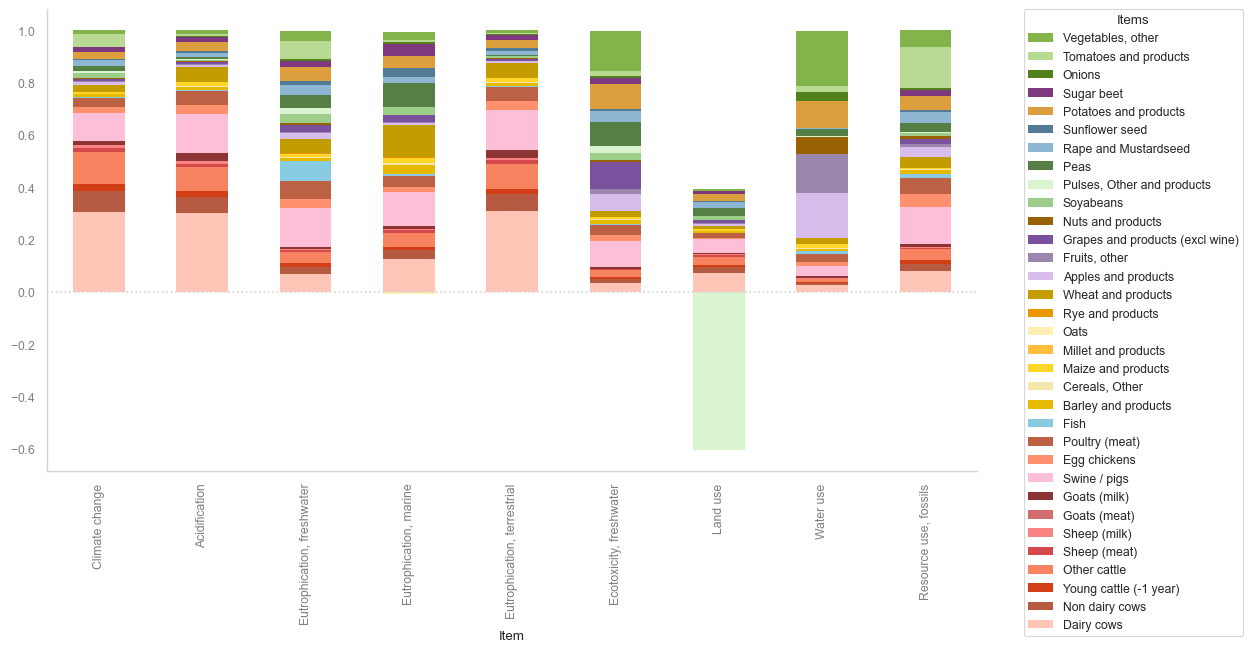

In [16]:
# PLOTTING - BAU SWISS

#Importing from excel
BAU_swiss_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='BAU_swiss_to_code', header=0)
# Setting Item as index
BAU_swiss_graph = BAU_swiss_graph.set_index('Item')

# NORMALIZING DF __________________________
sum_of_rows = BAU_swiss_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
normalized_df = BAU_swiss_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
normalized_df.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['Climate change', 'Acidification', 'Eutrophication, freshwater', 'Eutrophication, marine',
          'Eutrophication, terrestrial', 'Ecotoxicity, freshwater', 'Land use', 'Water use', 'Resource use, fossils']
ax.set_xticklabels(labels, rotation = 90) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
#x_label = plt.xlabel('X-axis Label')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('')
y_label.set_color('grey')



# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impacts per scenario/detailed_impacts_BAU_swiss.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()


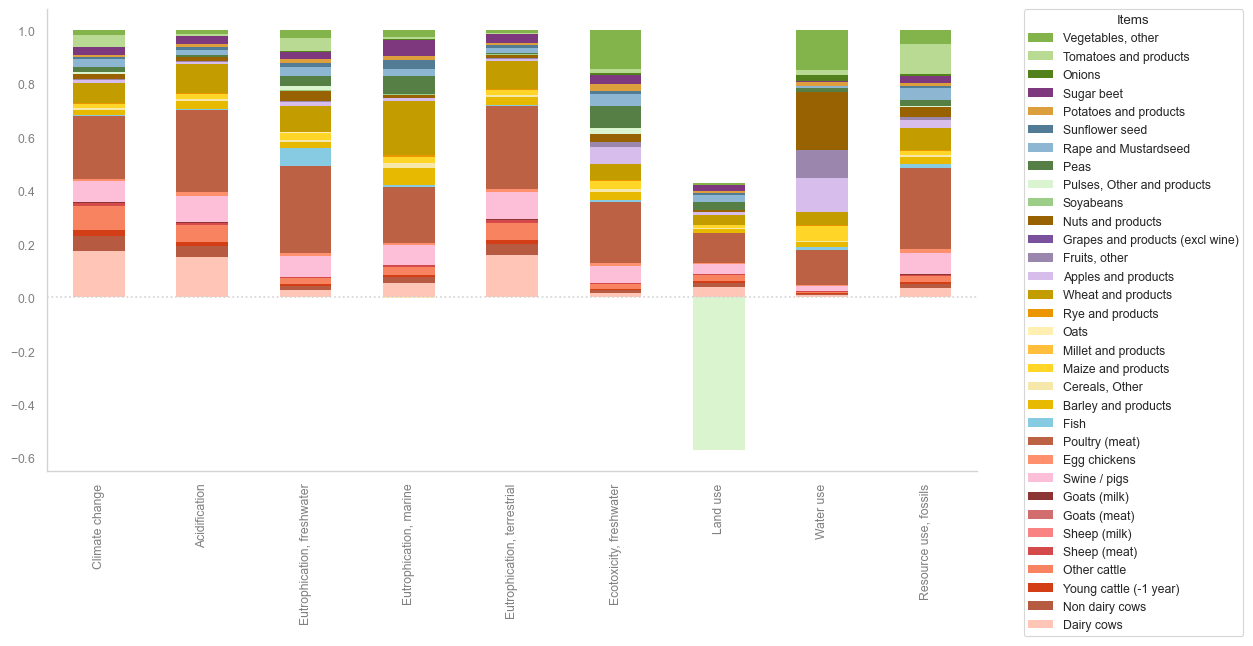

In [17]:
# PLOTTING - BAU Lancet

#Importing from excel
BAU_lancet_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='BAU_lancet_to_code', header=0)
# Setting Item as index
BAU_lancet_graph = BAU_lancet_graph.set_index('Item')

# NORMALIZING DF __________________________
sum_of_rows = BAU_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
normalized_df = BAU_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
normalized_df.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['Climate change', 'Acidification', 'Eutrophication, freshwater', 'Eutrophication, marine',
          'Eutrophication, terrestrial', 'Ecotoxicity, freshwater', 'Land use', 'Water use', 'Resource use, fossils']
ax.set_xticklabels(labels, rotation = 90) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('X-axis Label')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impacts per scenario/detailed_impacts_BAU_lancet.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()


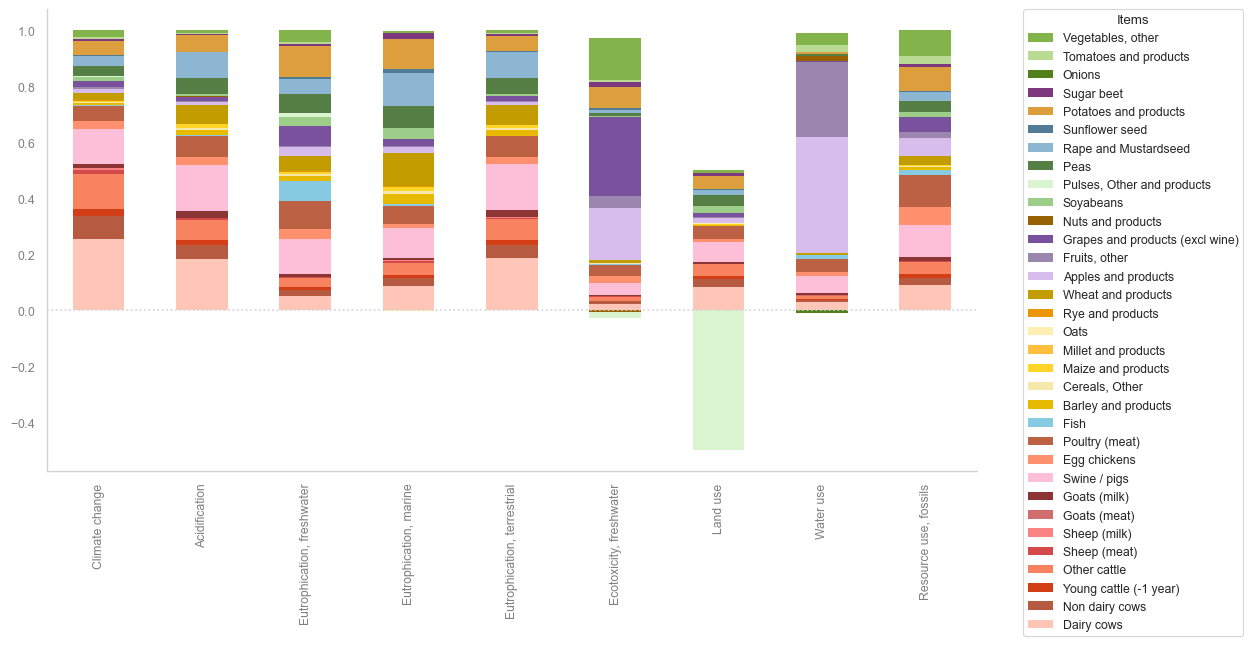

In [18]:
# PLOTTING - OA Swiss

#Importing from excel
OA_swiss_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='OA_swiss_to_code', header=0)
# Setting Item as index
OA_swiss_graph = OA_swiss_graph.set_index('Item')

# NORMALIZING DF __________________________
sum_of_rows = OA_swiss_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
normalized_df = OA_swiss_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
normalized_df.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['Climate change', 'Acidification', 'Eutrophication, freshwater', 'Eutrophication, marine',
          'Eutrophication, terrestrial', 'Ecotoxicity, freshwater', 'Land use', 'Water use', 'Resource use, fossils']
ax.set_xticklabels(labels, rotation = 90) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impacts per scenario/detailed_impacts_OA_swiss.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()


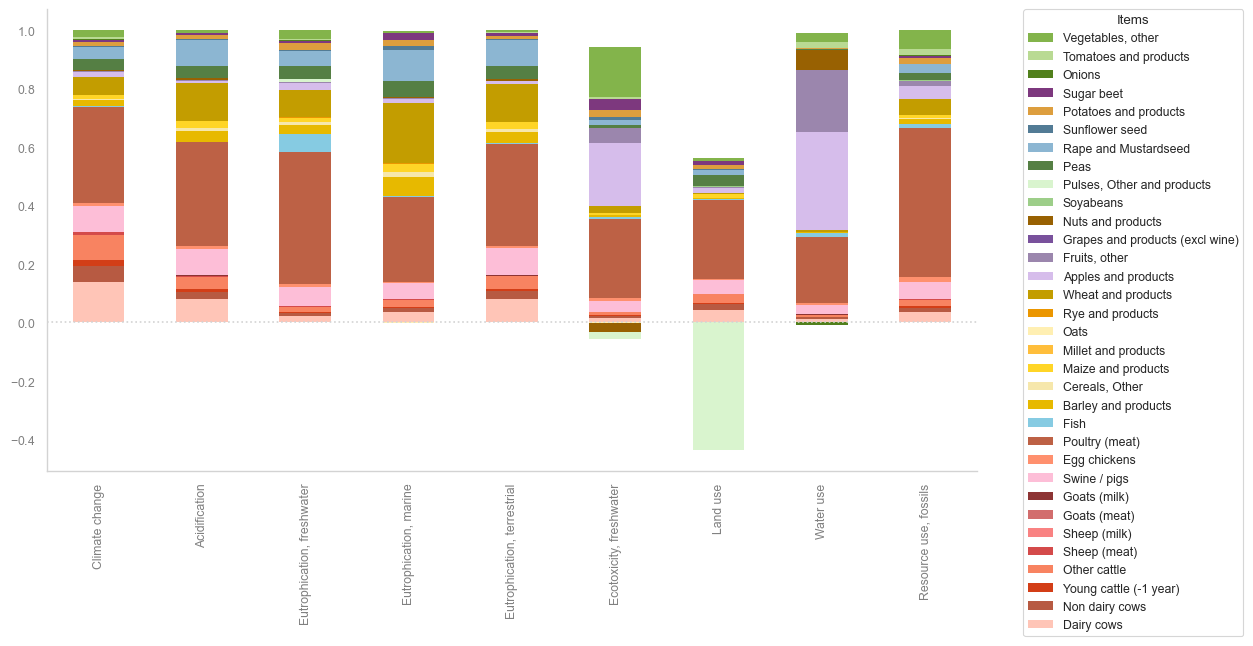

In [19]:
# PLOTTING - OA Lancet

#Importing from excel
OA_lancet_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='OA_lancet_to_code', header=0)
# Setting Item as index
OA_lancet_graph = OA_lancet_graph.set_index('Item')

# NORMALIZING DF __________________________
sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
normalized_df.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['Climate change', 'Acidification', 'Eutrophication, freshwater', 'Eutrophication, marine',
          'Eutrophication, terrestrial', 'Ecotoxicity, freshwater', 'Land use', 'Water use', 'Resource use, fossils']
ax.set_xticklabels(labels, rotation = 90) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impacts per scenario/detailed_impacts_OA_Lancet.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

In [20]:
# GRAPHIQUE COMPARATIF DES SCENARIOS 2050 - PREPARATION

# Importing the datas
BAU_swiss = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='BAU_swiss', header=0)
BAU_lancet = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='BAU_lancet', header=0)
OA_swiss = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='OA_swiss', header=0)
OA_lancet = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='OA_lancet', header=0)

# Summing all the columns and Grouping the data
# Assuming you have four DataFrames: df1, df2, df3, df4
dfs = [BAU_swiss, BAU_lancet, OA_swiss, OA_lancet]
# Calculate the column sums for each DataFrame
sums = [df.sum(axis=0) for df in dfs]
# Concatenate the sums into a new DataFrame
sum_df = pd.concat(sums, axis=1).T

# COPYING THE TAB TO EXCEL TO TRANSPOSE

# Importing the tranposed df
scenario_comparison = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenario comparison.xlsx', sheet_name='total_impacts', header=0)

# Setting 'Scenario' as index for normalization
scenario_comparison = scenario_comparison.set_index('Scenario')

# Normalizing based on the higest impact value per category
# Assuming you have a DataFrame called 'df'
column_max = scenario_comparison.abs().max()  # Step 1: Find the maximum value for each column
normalized_df = scenario_comparison / column_max  # Step 2: Divide each column by its maximum value

# Assign the normalized values back to the respective columns in the DataFrame
df_normalized = pd.DataFrame(normalized_df, columns=scenario_comparison.columns)

# COPYING THE TAB TO EXCEL TO TRANSPOSE
scenario_comparison

,Climate change [ kg CO2 eq],Acidification [ mol H+ eq],"Eutrophication, freshwater [ kg P eq]","Eutrophication, marine [ kg N eq]","Eutrophication, terrestrial [ mol N eq]","Ecotoxicity, freshwater [ CTUe]",Land use [ Pt],"Water use [ m3 depriv,]","Resource use, fossils [ MJ]"
Scenario,,,,,,,,,
BAU swiss,2.490787e+09,3.967971e+07,405843.071425,1.774089e+07,1.722304e+08,8.248493e+10,-1.260341e+11,4.554846e+09,1.201432e+10
BAU lancet,1.984030e+09,3.529403e+07,449304.440867,1.820022e+07,1.513790e+08,7.308826e+10,-6.996401e+10,5.364513e+09,1.251143e+10
OA swiss,2.312637e+09,4.868446e+07,421717.973557,2.584885e+07,2.164980e+08,7.959743e+10,3.937046e+08,4.003818e+09,1.001234e+10
OA lancet,1.937513e+09,5.158509e+07,483493.730953,2.955622e+07,2.286890e+08,5.412496e+10,5.691117e+10,4.177488e+09,1.167586e+10


In [21]:
# GRAPHIQUE COMPARATIF DES SCENARIOS 2018 VS 2050 - PREPARATION

# Creating a df with the impacts values for 2018 - Livestock
data_livestock = {
    'Item': ['Livestock', 'to drop'],
    'Climate change [ kg CO2 eq]': [5190964117.467826, None],
    'Acidification [ mol H+ eq]': [83021148.51528, None],
    'Eutrophication, freshwater [ kg P eq]': [608233.582931, None],
    'Eutrophication, marine [ kg N eq]': [24710842.119716, None],
    'Eutrophication, terrestrial [ mol N eq]': [366410362.175543, None],
    'Ecotoxicity, freshwater [ CTUe]': [79022819343.025589, None],
    'Land use [ Pt]': [405687058654.539978, None],
    'Water use [ m3 depriv,]': [2082572333.341768, None],
    'Resource use, fossils [ MJ]': [17166886355.828705, None]
}
livestock_2018 = pd.DataFrame(data_livestock)
# Dropping the row 'to drop'
livestock_2018 = livestock_2018.drop(livestock_2018[livestock_2018['Item'] == 'to drop'].index)

# Creating a df with the impacts values for 2018 - Fish
data_fish = {
    'Item': ['Freshwater Fish'],
    'Climate change [ kg CO2 eq]': [12827590.5],
    'Acidification [ mol H+ eq]': [145871.7],
    'Eutrophication, freshwater [ kg P eq]': [37018.8],
    'Eutrophication, marine [ kg N eq]': [220790.7],
    'Eutrophication, terrestrial [ mol N eq]': [587724.3],
    'Ecotoxicity, freshwater [ CTUe]': [429684127.2],
    'Land use [ Pt]': [1026546918.0],
    'Water use [ m3 depriv,]': [66666146.7],
    'Resource use, fossils [ MJ]': [204198006.0]
}

fish_2018 = pd.DataFrame(data_fish)

# Creating a df with the impacts values for 2018 - Crops conv
data_crop_conv = {
    'Item': ['Crop conv', 'to drop 1', 'to drop 2'],
    'Climate change [ kg CO2 eq]': [747060959.097777, None, None],
    'Acidification [ mol H+ eq]': [12868848.234202, None, None],
    'Eutrophication, freshwater [ kg P eq]': [226321.572612, None, None],
    'Eutrophication, marine [ kg N eq]': [12807679.835985, None, None],
    'Eutrophication, terrestrial [ mol N eq]': [53246827.418944, None, None],
    'Ecotoxicity, freshwater [ CTUe]': [49494035160.259941, None, None],
    'Land use [ Pt]': [69402315145.65976, None, None],
    'Water use [ m3 depriv,]': [3596234636.389255, None, None],
    'Resource use, fossils [ MJ]': [6738969783.751674, None, None]
}
crop_conv_2018 = pd.DataFrame(data_crop_conv)
# Dropping the rows 'to drop'
crop_conv_2018 = crop_conv_2018.drop(crop_conv_2018[crop_conv_2018['Item'] == 'to drop 1'].index)
crop_conv_2018 = crop_conv_2018.drop(crop_conv_2018[crop_conv_2018['Item'] == 'to drop 2'].index)

# Creating a df with the impacts values for 2018 - Crops org
data_crop_org = {
    'Item': ['Crop org'],
    'Climate change [ kg CO2 eq]': [31959364.047352],
    'Acidification [ mol H+ eq]': [1311550.288618],
    'Eutrophication, freshwater [ kg P eq]': [12147.056324],
    'Eutrophication, marine [ kg N eq]': [1147414.284553],
    'Eutrophication, terrestrial [ mol N eq]': [5847345.500207],
    'Ecotoxicity, freshwater [ CTUe]': [2960464471.698339],
    'Land use [ Pt]': [3443152819.23496],
    'Water use [ m3 depriv,]': [129110915.475463],
    'Resource use, fossils [ MJ]': [228961236.859103]
}
crop_org_2018 = pd.DataFrame(data_crop_org)

# Summing them all together

# Concatenate the individual DataFrames
combined_df = pd.concat([livestock_2018, fish_2018, crop_conv_2018, crop_org_2018])

# Compute the sum of each column
summed_values = combined_df.sum(axis=0)

# Create a new DataFrame with the summed values
summed_df = pd.DataFrame(summed_values).T
# Change the name of the row in the 'Item' column
summed_df.loc[summed_df['Item'] == 'LivestockFreshwater FishCrop convCrop org', 'Item'] = 'Scenario 2018'
# Setting the index
summed_df = summed_df.set_index('Item')

# Concatenate the two DataFrames vertically
combined_df = pd.concat([summed_df, scenario_comparison], ignore_index=False)

# Normalizing based on the higest impact value per category
# Assuming you have a DataFrame called 'df'
column_max = combined_df.abs().max()  # Step 1: Find the maximum value for each column
normalized_df = combined_df / column_max  # Step 2: Divide each column by its maximum value

# Assign the normalized values back to the respective columns in the DataFrame
df_normalized_2018_2050 = pd.DataFrame(normalized_df, columns=combined_df.columns)

# COPYING THE TAB TO EXCEL TO TRANSPOSE

df_normalized_2018_2050
combined_df

,Climate change [ kg CO2 eq],Acidification [ mol H+ eq],"Eutrophication, freshwater [ kg P eq]","Eutrophication, marine [ kg N eq]","Eutrophication, terrestrial [ mol N eq]","Ecotoxicity, freshwater [ CTUe]",Land use [ Pt],"Water use [ m3 depriv,]","Resource use, fossils [ MJ]"
Scenario 2018,5982812031.112955,97347418.7381,883721.011867,38886726.940254,426092259.394694,131907003102.183868,479559073537.434692,5874584031.906486,24339015382.439484
BAU swiss,2490787383.3,39679707.39,405843.071425,17740886.488,172230396.84,82484925083.0,-126034130842.0,4554846141.2,12014318758.0
BAU lancet,1984030198.8,35294029.258,449304.440867,18200216.166,151379032.06,73088261284.0,-69964007700.0,5364512815.7,12511425871.0
OA swiss,2312636908.37,48684462.0978,421717.973557,25848848.303,216497956.529,79597432138.0,393704620.0,4003817573.25,10012343474.91
OA lancet,1937512907.44,51585093.64,483493.730953,29556223.5,228688984.551,54124955226.0,56911167440.0,4177487717.43,11675863909.299999


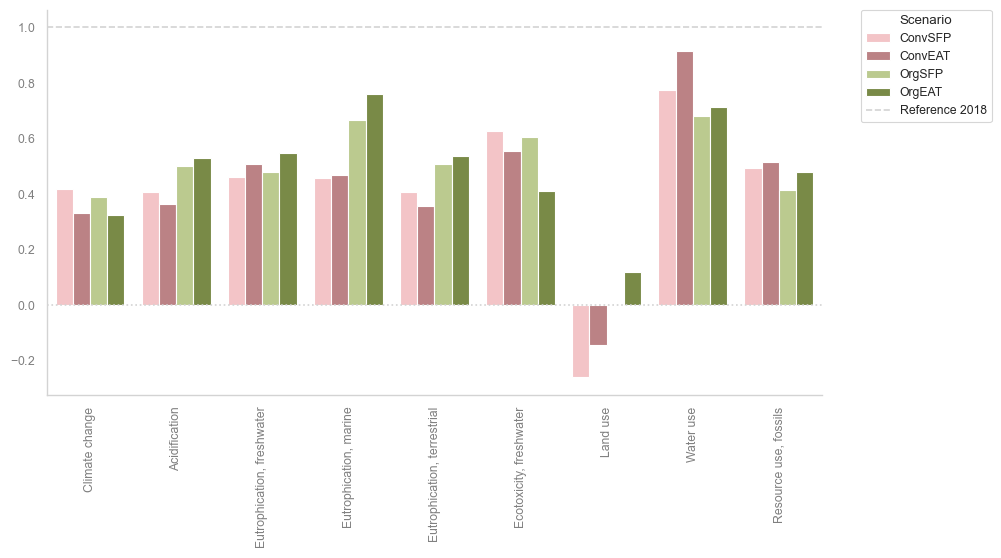

In [22]:
# PLOTTING SCENARIO COMPARISON 2018 & 2050

# Importing the normalied and transposed impacts
scenario_comparison_2018_2050 = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenario comparison.xlsx', sheet_name='normalized_2010_2050_T', header=0)

# Reset the index and convert 'Scenario' into a regular column
#scenario_comparison = scenario_comparison.reset_index().rename(columns={'index': 'Scenario'})

# Melting the df to convert the impact categories into a single column
melted_df = pd.melt(scenario_comparison_2018_2050, id_vars='Scenario', var_name='Impact Category', value_name='Value')

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_sce3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(10, 5))
# Create the barplot
sns.barplot(x='Scenario', y='Value', hue='Impact Category', data=melted_df)

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['Climate change', 'Acidification', 'Eutrophication, freshwater', 'Eutrophication, marine',
          'Eutrophication, terrestrial', 'Ecotoxicity, freshwater', 'Land use', 'Water use', 'Resource use, fossils']
ax.set_xticklabels(labels, rotation = 90) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax = plt.gca()
ax.axhline(y=0, color='lightgrey', linestyle='dotted')
ax.axhline(y=1, color='lightgrey', linestyle='--')

# Create a legend handle for BAU 2018
bau_legend = mlines.Line2D([], [], color='lightgrey', linestyle='--', label='BAU 2018')

# Get the existing legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Add the BAU 2018 legend handle and label to the existing handles and labels
handles.append(bau_legend)
labels.append('Reference 2018')

# Display the legend with the combined handles and labels
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Scenario')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Scenario')


# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Scenario comparison/scenario_comparison_2018_2050.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

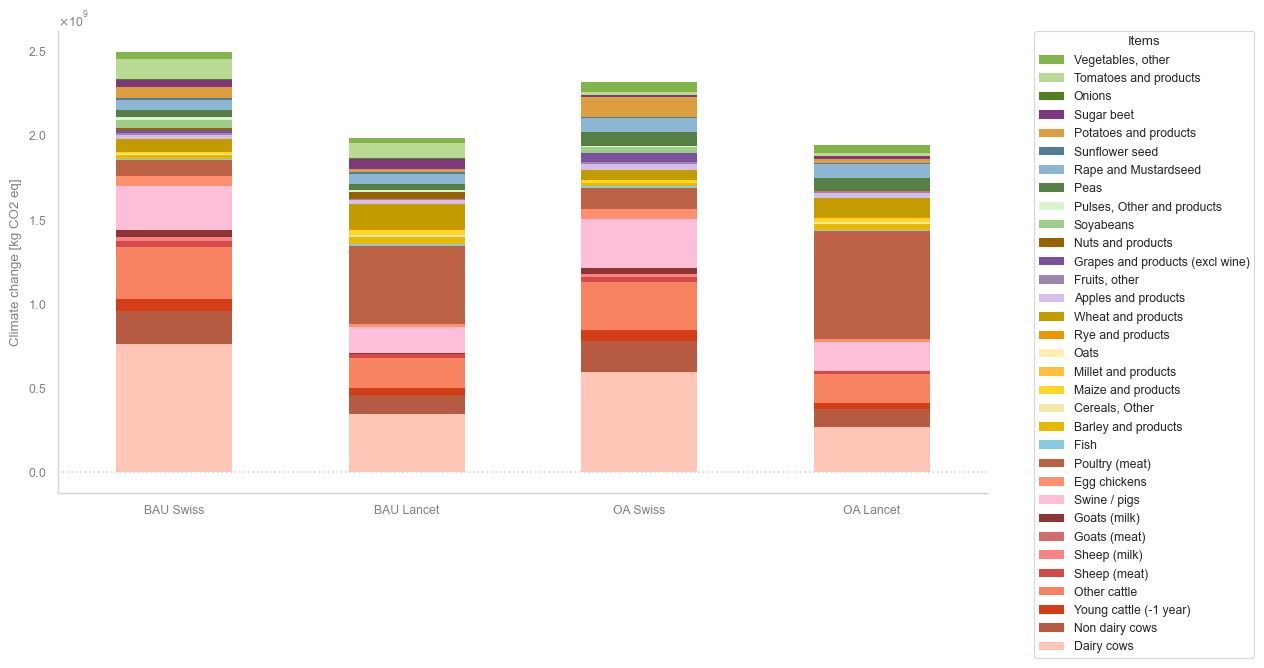

In [23]:
# PLOTTING - CLIMATE CHANGE

#Importing from excel
climate_change_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='CC_to_code', header=0)
# Setting Item as index
climate_change_graph = climate_change_graph.set_index('Item')

# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
climate_change_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['BAU Swiss', 'BAU Lancet', 'OA Swiss', 'OA Lancet']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Climate change [kg CO2 eq]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/climate_change.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

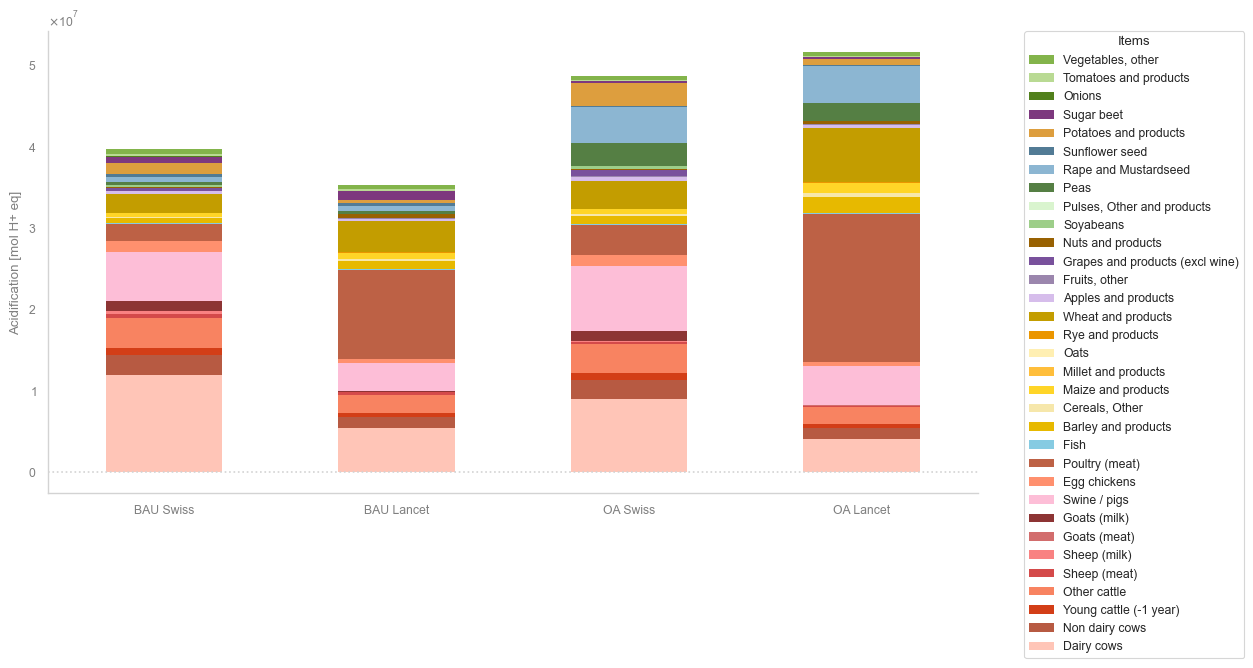

In [24]:
# PLOTTING - ACIDIFICATION

#Importing from excel
acidification_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='acidification_to_code', header=0)
# Setting Item as index
acidification_graph = acidification_graph.set_index('Item')

# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
acidification_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['BAU Swiss', 'BAU Lancet', 'OA Swiss', 'OA Lancet']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Acidification [mol H+ eq]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/acidification.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

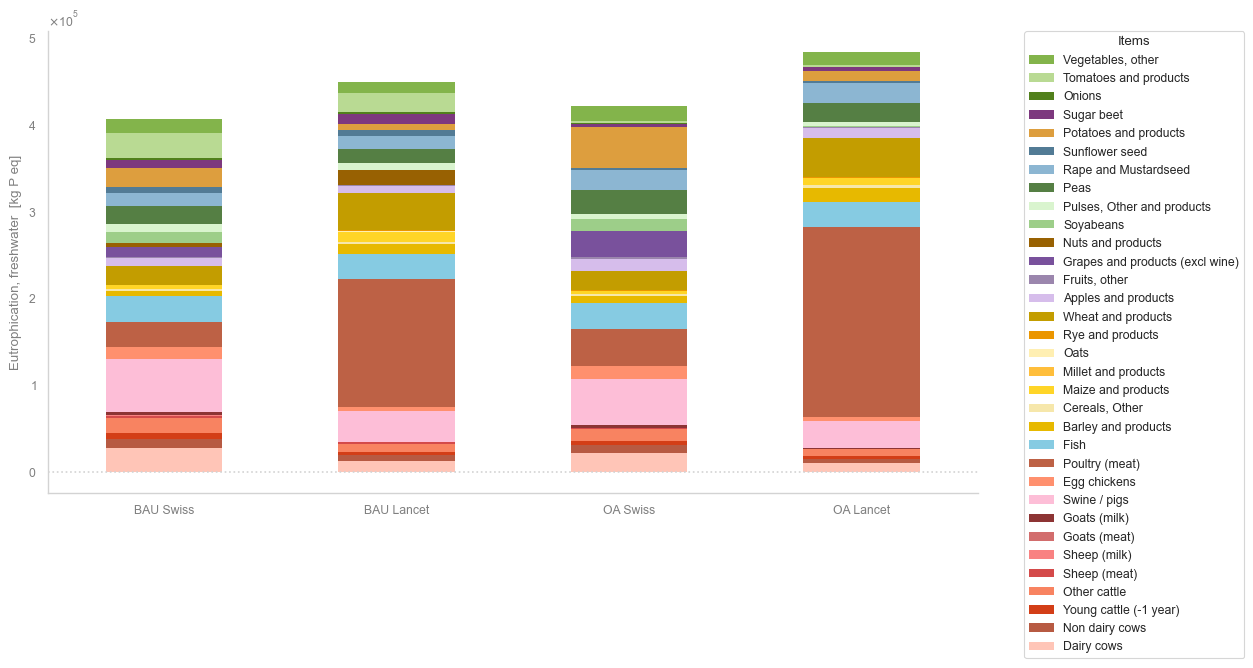

In [25]:
# PLOTTING - EUTROPHICATION, FRESHWATER

#Importing from excel
eutr_fresh_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='eutr_fres_to_code', header=0)
# Setting Item as index
eutr_fresh_graph = eutr_fresh_graph.set_index('Item')

# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
eutr_fresh_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['BAU Swiss', 'BAU Lancet', 'OA Swiss', 'OA Lancet']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Eutrophication, freshwater  [kg P eq]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/eutr_freshwater.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

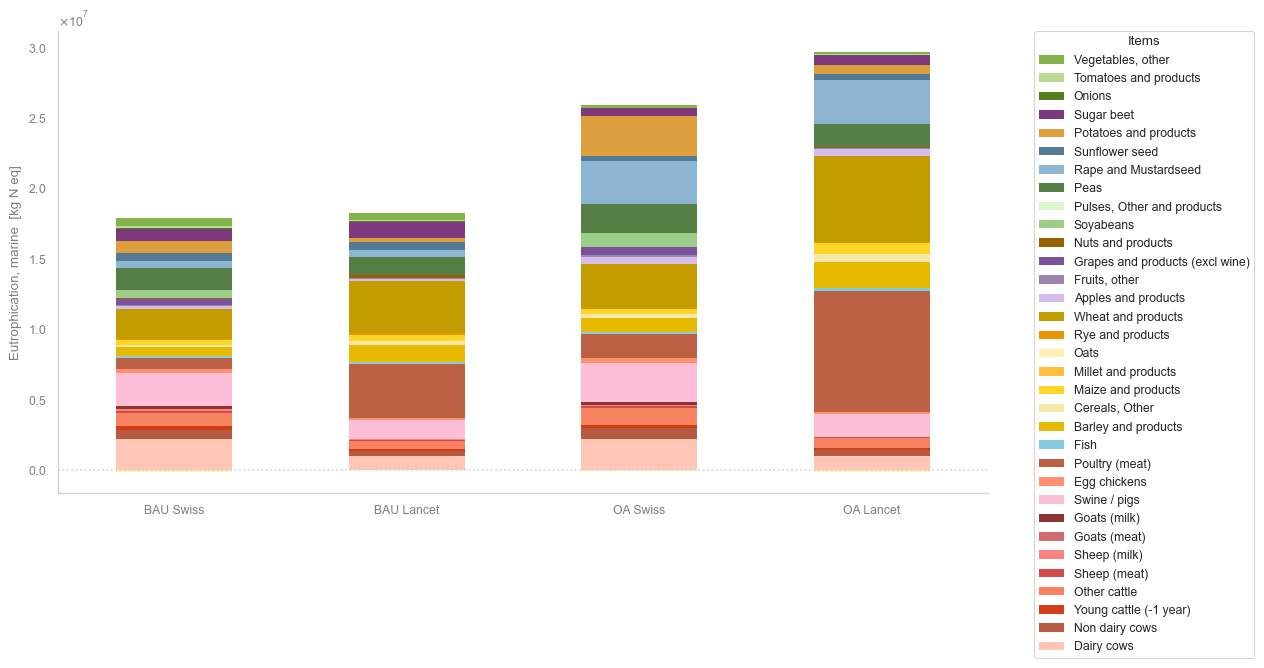

In [26]:
# PLOTTING - EUTROPHICATION, MARINE

#Importing from excel
eutr_marine_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='eutr_marine_to_code', header=0)
# Setting Item as index
eutr_marine_graph = eutr_marine_graph.set_index('Item')

# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
eutr_marine_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['BAU Swiss', 'BAU Lancet', 'OA Swiss', 'OA Lancet']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Eutrophication, marine  [kg N eq]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
#plt.savefig('Desktop/PDM/Graphiques/Impact categories/eutr_marine.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

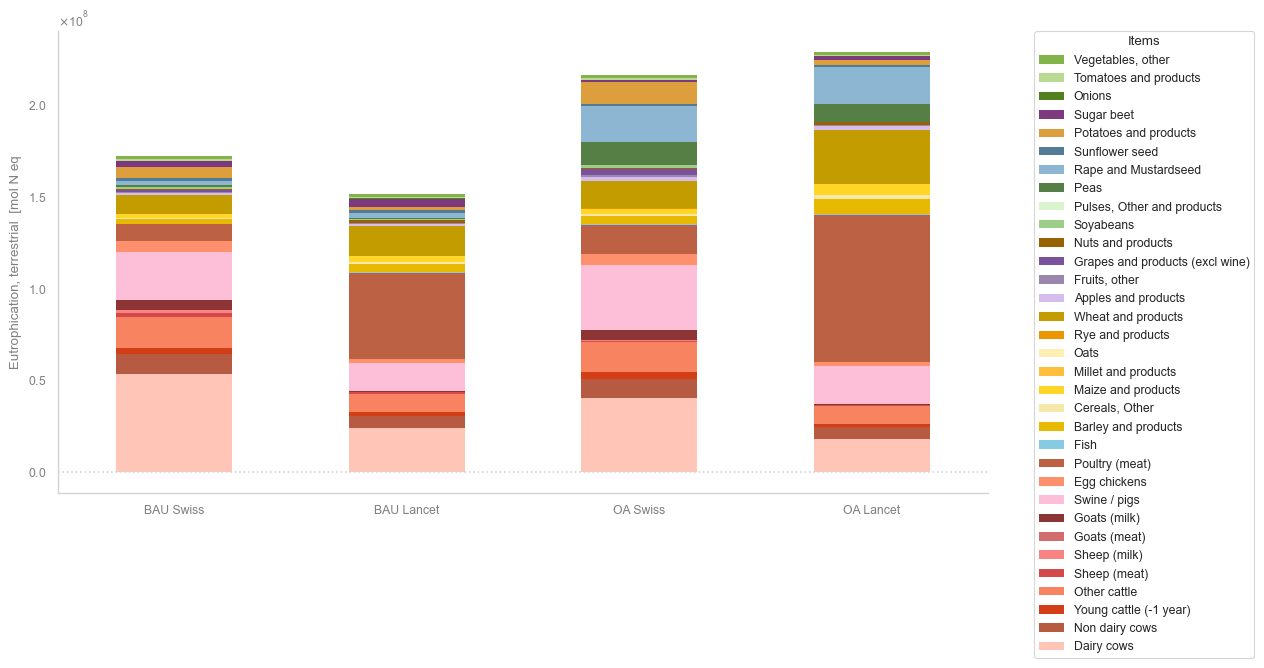

In [27]:
# PLOTTING - EUTROPHICATION, TERRESTRIAL

#Importing from excel
eutr_ter_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='eutr_ter_to_code', header=0)
# Setting Item as index
eutr_ter_graph = eutr_ter_graph.set_index('Item')

# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
eutr_ter_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['BAU Swiss', 'BAU Lancet', 'OA Swiss', 'OA Lancet']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Eutrophication, terrestrial  [mol N eq')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/eutr_ter.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

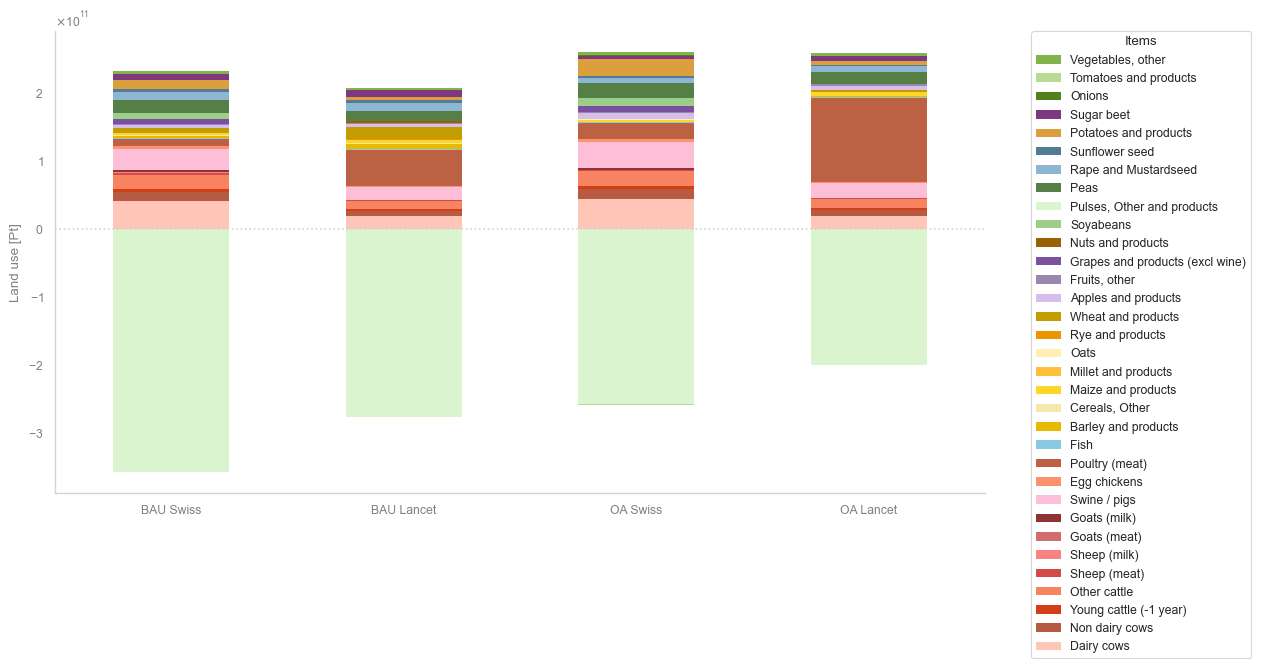

In [28]:
# PLOTTING - LAND USE

#Importing from excel
land_use_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='land_use_to_code', header=0)
# Setting Item as index
land_use_graph = land_use_graph.set_index('Item')

# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
land_use_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['BAU Swiss', 'BAU Lancet', 'OA Swiss', 'OA Lancet']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Land use [Pt]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/land_use.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

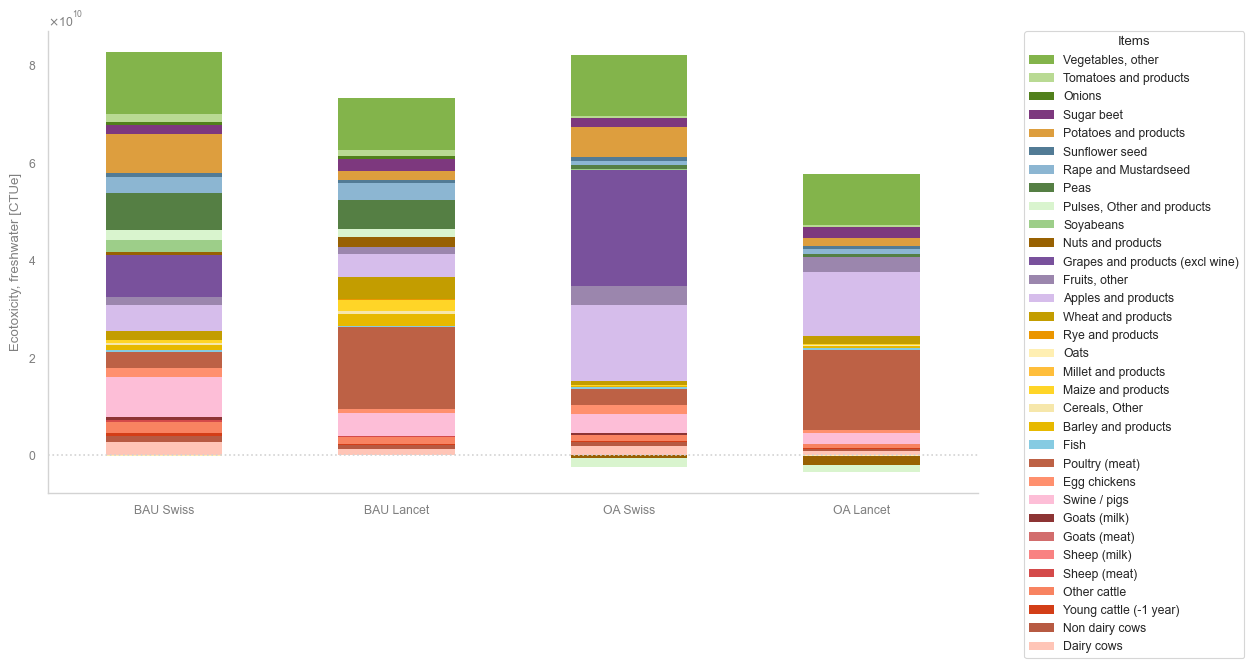

In [29]:
# PLOTTING -ECOTOX

#Importing from excel
ecotox_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='ecotox_to_code', header=0)
# Setting Item as index
ecotox_graph = ecotox_graph.set_index('Item')


# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
ecotox_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['BAU Swiss', 'BAU Lancet', 'OA Swiss', 'OA Lancet']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Ecotoxicity, freshwater [CTUe]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/ecotoxicity.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

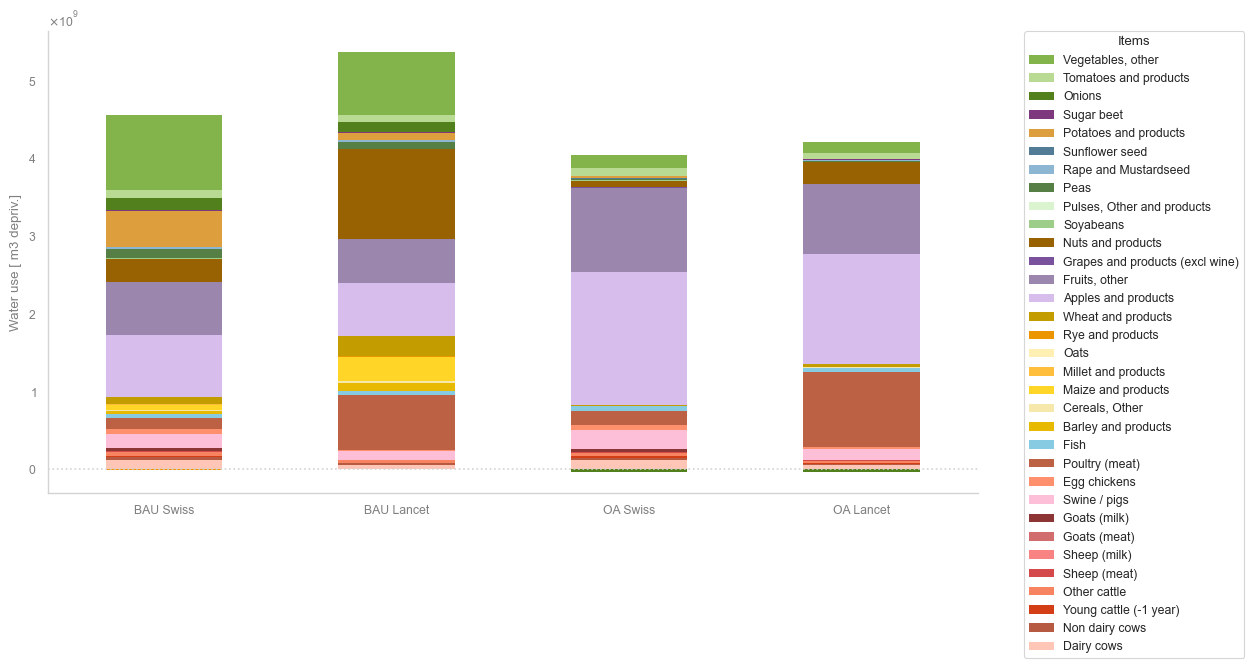

In [30]:
# PLOTTING - WATER USE

#Importing from excel
water_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='water_use_to_code', header=0)
# Setting Item as index
water_graph = water_graph.set_index('Item')

# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
water_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['BAU Swiss', 'BAU Lancet', 'OA Swiss', 'OA Lancet']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Water use [ m3 depriv.]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/water_use.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

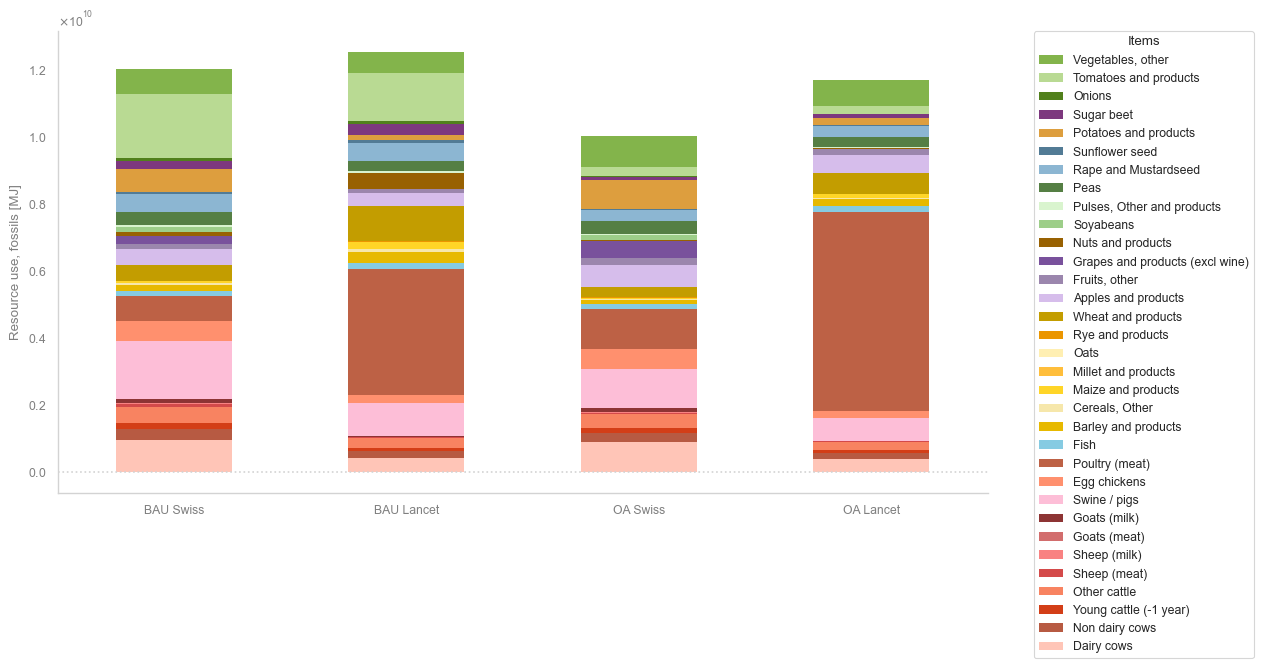

In [31]:
# PLOTTING - WATER USE

#Importing from excel
resource_graph = pd.read_excel('Desktop/PDM/Modelling_data/Environmental impacts/scenarios_to_code.xlsx', sheet_name='resource_to_code', header=0)
# Setting Item as index
resource_graph = resource_graph.set_index('Item')


# NORMALIZING DF __________________________
#sum_of_rows = OA_lancet_graph.abs().sum(axis=1)
# Normalize each row by dividing it by the sum of the row
#normalized_df = OA_lancet_graph.div(sum_of_rows, axis=0)

# GRID STYLE _________________________________
# Set the grid style
sns.set_style('white')
#sns.set_style('ticks')
# Set the seaborn context - for the text size
sns.set_context('paper')

# COLOR PALETTE ______________________________
# Set the color palette
sns.set_palette(custom_palette_lfc3)

# PLOT ______________________________
# Create a new figure and axes with desired figure size
fig, ax = plt.subplots(figsize=(12, 6))
# Create the stacked bar plot
resource_graph.plot(kind='bar', stacked=True, ax=ax, edgecolor='None') #edgecolor to change the color of the lines within the plot

# AXIS LABELS & LABEL TICKS______________________________
# Customize the plot
plt.ylabel('Produced mass [kt]')
plt.legend(title='')
# Customize the x-axis tick labels
labels = ['BAU Swiss', 'BAU Lancet', 'OA Swiss', 'OA Lancet']
ax.set_xticklabels(labels, rotation = 0) # Set rotation=0 to display labels horizontally

# AXIS UNITS ______________________________
# Changing the unit axis
plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Having ticks only in the y axis
#ax.tick_params(axis='x', which='both', bottom=False, top=False)
#ax.tick_params(axis='y', which='both', left=True)

# Changing the axis color
ax.spines['left'].set_color('lightgrey')  # Left y-axis
ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick color
ax.tick_params(colors='lightgrey')

# Customize the tick label color for the y-axis
plt.tick_params(axis='y', colors='grey')

# Customize the x-axis label color
x_label = plt.xlabel('')
x_label.set_color('grey')

# Customize the y-axis label color
y_label = plt.ylabel('Resource use, fossils [MJ]')
y_label.set_color('grey')

x_label = plt.xlabel('')

# Set the color of the x-axis tick labels
ax.tick_params(axis='x', colors='grey')

# LINE ______________________________
# Add a horizontal line at y = 0
ax.axhline(y=0, color='lightgrey', linestyle='dotted')

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/PDM/Graphiques/Impact categories/resource_fossil_use.pdf', format='pdf', bbox_inches='tight')

# DISPLAY PLOT ______________________________
# Display plot
plt.show()

In [32]:
# GRAPHS - SUBPLOTS

scenarios = ['ConvSFP', 'ConvEAT', 'OrgSFP', 'OrgEAT']

fig, axs = plt.subplots(3, 3, figsize=(10, 8), sharex=True)  # Create a 4x1 subplot with shared x-axis

# Plot stacked bar plot 1
acidification_graph.plot(kind='bar', stacked=True, ax=axs[0,0], edgecolor='None', legend=False)

# Plot stacked bar plot 2
ecotox_graph.plot(kind='bar', stacked=True, ax=axs[2,0], edgecolor='None', legend=False)

# Plot stacked bar plot 3
eutr_fresh_graph.plot(kind='bar', stacked=True, ax=axs[0,1], edgecolor='None', legend=False)

# Plot stacked bar plot 4
eutr_marine_graph.plot(kind='bar', stacked=True, ax=axs[1,1], edgecolor='None', legend=False)

# Plot stacked bar plot 5
eutr_ter_graph.plot(kind='bar', stacked=True, ax=axs[2,1], edgecolor='None', legend=False)

# Plot stacked bar plot 1
climate_change_graph.plot(kind='bar', stacked=True, ax=axs[1,0], edgecolor='None', legend=False)

# Plot stacked bar plot 2
land_use_graph.plot(kind='bar', stacked=True, ax=axs[0,2], edgecolor='None', legend=False)

# Plot stacked bar plot 3
water_graph.plot(kind='bar', stacked=True, ax=axs[2,2], edgecolor='None', legend=False)

# Plot stacked bar plot 4
resource_graph.plot(kind='bar', stacked=True, ax=axs[1,2], edgecolor='None', legend=False)



# You can add more customization to each subplot if needed

# Set the grid style
sns.set_style('white')
# Set the seaborn context - for the text size
sns.set_context('paper')

# Loop through all subplots to change axis colors
for i, ax in enumerate(axs.flatten()):
    ax.spines['left'].set_color('lightgrey')  # Left y-axis
    ax.spines['bottom'].set_color('lightgrey')  # Bottom x-axis
    # Remove the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Set the tick color
    ax.tick_params(colors='lightgrey')
    # Customize the axis label color
    ax.set_xlabel(''.format(i + 1), color='grey')  # Change x-axis label color
    ax.set_ylabel('Y Label for Plot {}'.format(i + 1), color='grey')  # Change y-axis label color
    # Set the color of the tick labels
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')
    # Changing y-axis unit formatting
    ax.get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    # Add a horizontal line at y = 0
    ax.axhline(y=0, color='lightgrey', linestyle='dotted')
    # Customize the x-axis tick labels
    ax.set_xticklabels(scenarios, rotation = 0)
    
    
# Add labels and legends
axs[0,0].set_ylabel('Acidification \n [mol H+ eq]')
axs[2,0].set_ylabel('Ecotoxicity \n [CTUe]')
axs[0,1].set_ylabel('Eutrophication, freshwater \n [kg P eq]')
axs[1,1].set_ylabel('Eutrophication, marine \n [kg N eq]')
axs[2,1].set_ylabel('Eutrophication, terrestrial \n [mol N eq]')
axs[1,0].set_ylabel('Climate Change \n [kg CO2 eq]')
axs[0,2].set_ylabel('Land use \n [Pt]')
axs[2,2].set_ylabel('Water use \n [m3 deprived]')
axs[1,2].set_ylabel('Resource use, fossils \n [MJ]')
#axs[3].set_xlabel('X Label for All Plots')
#axs[0].legend()
#axs[1].legend()

# LEGEND BOX ______________________________
# Customize the legend box
#legend = ax.legend(title='Scenarios', fancybox=True, edgecolor='red')
# Reversing the order of labels in the legend and placing the legend outside
handles, labels = ax.get_legend_handles_labels()
axs[0,2].legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Items')
#legend = axs[1, 2].legend(reversed(handles), reversed(labels), loc='upper left', title='Items')
# Changing legend location
#plt.legend(bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0)

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# SAVING IN PNG ______________________________
# Save the plot in PNG format
plt.savefig('Desktop/Valorisation Master/Graphiques/environmental_impacts.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

KeyboardInterrupt: 